# House Prices - Advanced Regression Techniques
In the real estate market, determining the fair price of a house can be challenging due to the large number of factors influencing prices, such as location, size, and quality of materials. Buyers often overpay, and sellers may lose money due to inaccurate pricing. This project aims to solve this problem by creating a machine learning model that predicts house prices based on critical features. The model will be deployed in an interactive tool to assist buyers, sellers, and real estate agents in making informed decisions, ultimately improving market transparency and efficiency.

## Importing Libraries

In [ ]:
import math

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set()

## Loading the dataset

In [ ]:
sample_submission = pd.read_csv('..\\Dataset\\sample_submission.csv')
test = pd.read_csv('..\\Dataset\\test.csv')
train = pd.read_csv('..\\Dataset\\train_main.csv')

## Initial Inspecting

In [100]:
sample_submission

,Id,SalePrice
0,1461,169277.052498
1,1462,187758.393989
2,1463,183583.683570
3,1464,179317.477511
4,1465,150730.079977
...,...,...
1454,2915,167081.220949
1455,2916,164788.778231
1456,2917,219222.423400
1457,2918,184924.279659


In [101]:
sample_submission.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Id         1459 non-null   int64  
 1   SalePrice  1459 non-null   float64
dtypes: float64(1), int64(1)
memory usage: 22.9 KB


In [102]:
test

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,2915,160,RM,21.0,1936,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2006,WD,Normal
1455,2916,160,RM,21.0,1894,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,4,2006,WD,Abnorml
1456,2917,20,RL,160.0,20000,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,9,2006,WD,Abnorml
1457,2918,85,RL,62.0,10441,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,MnPrv,Shed,700,7,2006,WD,Normal


In [103]:
train

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


## Building the model

In [104]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [105]:
regressor = LinearRegression()
x = train.iloc[:, :-1]
y = train.iloc[:, -1]
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25)

In [106]:
regressor.fit(x_train, y_train)
y_pred = regressor.predict(x_test)

ValueError: could not convert string to float: 'RL'

## As it shown we can't predict via categorical values so i should see the correlation of categorical variables to target variable to decide which ones to keep and transfer them to numeric values

In [107]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [108]:
categorical_columns = train.select_dtypes(include='object').copy()

In [109]:
categorical_columns

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,...,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
0,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
1,RL,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
2,RL,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
3,RL,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,...,Detchd,Unf,TA,TA,Y,NaN,NaN,NaN,WD,Abnorml
4,RL,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
1456,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NWAmes,Norm,...,Attchd,Unf,TA,TA,Y,NaN,MnPrv,NaN,WD,Normal
1457,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Crawfor,Norm,...,Attchd,RFn,TA,TA,Y,NaN,GdPrv,Shed,WD,Normal
1458,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,...,Attchd,Unf,TA,TA,Y,NaN,NaN,NaN,WD,Normal


In [110]:
categorical_columns.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 43 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   MSZoning       1460 non-null   object
 1   Street         1460 non-null   object
 2   Alley          91 non-null     object
 3   LotShape       1460 non-null   object
 4   LandContour    1460 non-null   object
 5   Utilities      1460 non-null   object
 6   LotConfig      1460 non-null   object
 7   LandSlope      1460 non-null   object
 8   Neighborhood   1460 non-null   object
 9   Condition1     1460 non-null   object
 10  Condition2     1460 non-null   object
 11  BldgType       1460 non-null   object
 12  HouseStyle     1460 non-null   object
 13  RoofStyle      1460 non-null   object
 14  RoofMatl       1460 non-null   object
 15  Exterior1st    1460 non-null   object
 16  Exterior2nd    1460 non-null   object
 17  MasVnrType     588 non-null    object
 18  ExterQual      1460 non-null

# Check the missing values and drop features with more than 80 percent missing values

In [111]:
number_of_missing_values = categorical_columns.isna().sum()
len_of_dataframe = len(categorical_columns)
missing_values_percentage = number_of_missing_values / len_of_dataframe * 100
missing_values_percentage[missing_values_percentage >= 80]

Alley          93.767123
PoolQC         99.520548
Fence          80.753425
MiscFeature    96.301370
dtype: float64

In [112]:
categorical_columns.isna().sum()

MSZoning            0
Street              0
Alley            1369
LotShape            0
LandContour         0
Utilities           0
LotConfig           0
LandSlope           0
Neighborhood        0
Condition1          0
Condition2          0
BldgType            0
HouseStyle          0
RoofStyle           0
RoofMatl            0
Exterior1st         0
Exterior2nd         0
MasVnrType        872
ExterQual           0
ExterCond           0
Foundation          0
BsmtQual           37
BsmtCond           37
BsmtExposure       38
BsmtFinType1       37
BsmtFinType2       38
Heating             0
HeatingQC           0
CentralAir          0
Electrical          1
KitchenQual         0
Functional          0
FireplaceQu       690
GarageType         81
GarageFinish       81
GarageQual         81
GarageCond         81
PavedDrive          0
PoolQC           1453
Fence            1179
MiscFeature      1406
SaleType            0
SaleCondition       0
dtype: int64

# Filling the missing values


In [113]:
categorical_columns['Alley'] = categorical_columns['Alley'].fillna(
    'noAlley')  # Alley : null values means no alley access
categorical_columns['PoolQC'] = categorical_columns['PoolQC'].fillna('noPool')  # PoolQC : null values means no pool
categorical_columns['Fence'] = categorical_columns['Fence'].fillna('noFence')  # Fence : null values means no fence
categorical_columns['MiscFeature'] = categorical_columns['MiscFeature'].fillna(
    'noMisc')  # MiscFeature : null values means no Miscellaneous feature

### MasVnrType

In [114]:
categorical_columns['MasVnrType']

0       BrkFace
1           NaN
2       BrkFace
3           NaN
4       BrkFace
         ...   
1455        NaN
1456      Stone
1457        NaN
1458        NaN
1459        NaN
Name: MasVnrType, Length: 1460, dtype: object

In [115]:
categorical_columns['MasVnrType'] = categorical_columns['MasVnrType'].fillna('noMasVnr')

### FireplaceQu

In [116]:
categorical_columns['FireplaceQu']

0       NaN
1        TA
2        TA
3        Gd
4        TA
       ... 
1455     TA
1456     TA
1457     Gd
1458    NaN
1459    NaN
Name: FireplaceQu, Length: 1460, dtype: object

In [117]:
categorical_columns['FireplaceQu'] = categorical_columns['FireplaceQu'].fillna('noFireplace')

### GarageQual, GarageCond, GarageType, GarageFinish

In [118]:
categorical_columns['GarageQual'] = categorical_columns['GarageQual'].fillna('noGarage')
categorical_columns['GarageCond'] = categorical_columns['GarageCond'].fillna('noGarage')
categorical_columns['GarageType'] = categorical_columns['GarageType'].fillna('noGarage')
categorical_columns['GarageFinish'] = categorical_columns['GarageFinish'].fillna('noGarage')

In [119]:
categorical_columns.isna().sum()

MSZoning          0
Street            0
Alley             0
LotShape          0
LandContour       0
Utilities         0
LotConfig         0
LandSlope         0
Neighborhood      0
Condition1        0
Condition2        0
BldgType          0
HouseStyle        0
RoofStyle         0
RoofMatl          0
Exterior1st       0
Exterior2nd       0
MasVnrType        0
ExterQual         0
ExterCond         0
Foundation        0
BsmtQual         37
BsmtCond         37
BsmtExposure     38
BsmtFinType1     37
BsmtFinType2     38
Heating           0
HeatingQC         0
CentralAir        0
Electrical        1
KitchenQual       0
Functional        0
FireplaceQu       0
GarageType        0
GarageFinish      0
GarageQual        0
GarageCond        0
PavedDrive        0
PoolQC            0
Fence             0
MiscFeature       0
SaleType          0
SaleCondition     0
dtype: int64

### BsmtExposure, BsmtFinType2, BsmtCond, BsmtFinType1, BsmtQual

In [120]:
categorical_columns['BsmtExposure'] = categorical_columns['BsmtExposure'].fillna('noBasement')
categorical_columns['BsmtFinType2'] = categorical_columns['BsmtFinType2'].fillna('noBasement')
categorical_columns['BsmtCond'] = categorical_columns['BsmtCond'].fillna('noBasement')
categorical_columns['BsmtFinType1'] = categorical_columns['BsmtFinType1'].fillna('noBasement')
categorical_columns['BsmtQual'] = categorical_columns['BsmtQual'].fillna('noBasement')

### Electrical

In [121]:
categorical_columns['Electrical']

0       SBrkr
1       SBrkr
2       SBrkr
3       SBrkr
4       SBrkr
        ...  
1455    SBrkr
1456    SBrkr
1457    SBrkr
1458    FuseA
1459    SBrkr
Name: Electrical, Length: 1460, dtype: object

In [122]:
categorical_columns['Electrical'].value_counts()

Electrical
SBrkr    1334
FuseA      94
FuseF      27
FuseP       3
Mix         1
Name: count, dtype: int64

i will fill the missing value with the most frequently value

In [123]:
categorical_columns['Electrical'] = categorical_columns['Electrical'].fillna(
    categorical_columns['Electrical'].mode()[0])

In [124]:
categorical_columns.isna().sum()

MSZoning         0
Street           0
Alley            0
LotShape         0
LandContour      0
Utilities        0
LotConfig        0
LandSlope        0
Neighborhood     0
Condition1       0
Condition2       0
BldgType         0
HouseStyle       0
RoofStyle        0
RoofMatl         0
Exterior1st      0
Exterior2nd      0
MasVnrType       0
ExterQual        0
ExterCond        0
Foundation       0
BsmtQual         0
BsmtCond         0
BsmtExposure     0
BsmtFinType1     0
BsmtFinType2     0
Heating          0
HeatingQC        0
CentralAir       0
Electrical       0
KitchenQual      0
Functional       0
FireplaceQu      0
GarageType       0
GarageFinish     0
GarageQual       0
GarageCond       0
PavedDrive       0
PoolQC           0
Fence            0
MiscFeature      0
SaleType         0
SaleCondition    0
dtype: int64

# Distribution of Target variable(SalePrice)

<Axes: xlabel='SalePrice', ylabel='Count'>

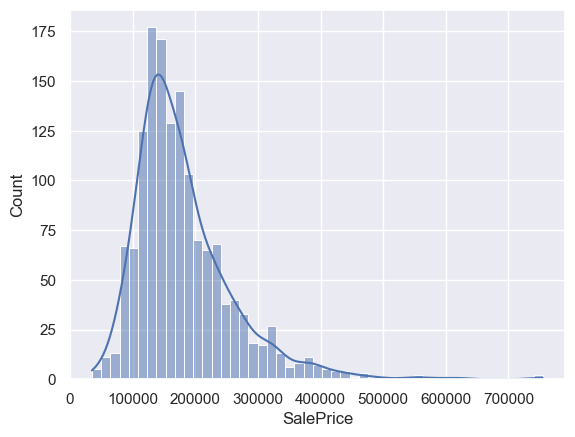

In [125]:
sns.histplot(data=train, x='SalePrice', kde=True)

# Log-Transformation
since it is right-skewed i should perform log-transformation

In [126]:
train['SalePrice'].skew()

1.8828757597682129

In [127]:
train['SalePrice-noSkew'] = np.log1p(train['SalePrice'])

<Axes: xlabel='SalePrice-noSkew', ylabel='Count'>

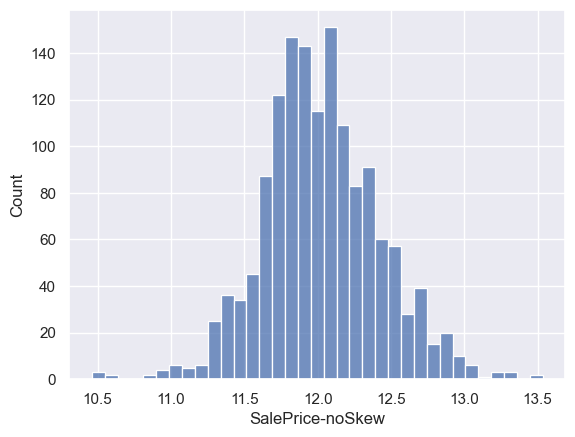

In [128]:
sns.histplot(x=train['SalePrice-noSkew'])

## Check for number of Observation for assumption to have reliable "Anova" test

In [129]:
number_of_feature= {}
for column in categorical_columns.columns:
    number_of_feature[column]=categorical_columns[column].value_counts()
number_of_feature_df=pd.DataFrame(number_of_feature)

In [130]:
non_nan_values_df = number_of_feature_df[number_of_feature_df<20].dropna(how='all', axis=1).dropna(how='all', axis=0)

In [131]:
columns_to_drop=[column for column in categorical_columns.columns if categorical_columns[column].nunique()<2 and any(categorical_columns[column].value_counts()<100)]
columns_to_drop

[]

In [132]:
non_nan_values_df=non_nan_values_df.fillna('')
# non_nan_values_df.to_excel('Features_with_less_than_20_observation.xlsx')
non_nan_values_df

,MSZoning,Street,LotShape,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,HouseStyle,...,Electrical,Functional,GarageType,GarageQual,GarageCond,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
1.5Unf,,,,,,,,,,14.0,...,,,,,,,,,,
2.5Fin,,,,,,,,,,8.0,...,,,,,,,,,,
2.5Unf,,,,,,,,,,11.0,...,,,,,,,,,,
2Types,,,,,,,,,,,...,,,6.0,,,,,,,
ALQ,,,,,,,,,,,...,,,,,,,,,,
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Veenker,,,,,,,11.0,,,,...,,,,,,,,,,
Wall,,,,,,,,,,,...,,,,,,,,,,
WdShake,,,,,,,,,,,...,,,,,,,,,,
WdShngl,,,,,,,,,,,...,,,,,,,,,,


## Taking care of features with less than of 20 observation for having more rliable Anova test

## MSZoning

In [133]:
categorical_columns['MSZoning']=categorical_columns['MSZoning'].replace(['RH','C (all)'],'RH & C (all)')

In [134]:
categorical_columns['MSZoning'].value_counts()

MSZoning
RL              1151
RM               218
FV                65
RH & C (all)      26
Name: count, dtype: int64

## Street
i will drop this because of have 2 category and ne of them just have 6 observation which is not good for predicting

In [135]:
categorical_columns.drop('Street',axis=1,inplace=True)

## LotShape

In [136]:
categorical_columns['LotShape']=categorical_columns['LotShape'].replace(['IR2','IR3'],'IR2 & IR3')

In [137]:
categorical_columns['LotShape'].value_counts()

LotShape
Reg          925
IR1          484
IR2 & IR3     51
Name: count, dtype: int64

## Utilities

In [138]:
categorical_columns['Utilities'].value_counts()

Utilities
AllPub    1459
NoSeWa       1
Name: count, dtype: int64

<Axes: xlabel='Utilities', ylabel='SalePrice-noSkew'>

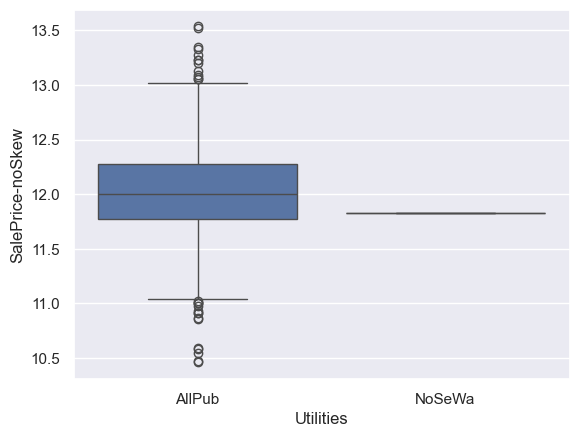

In [139]:
sns.boxplot(x=categorical_columns['Utilities'],y=train['SalePrice-noSkew'])

i will drop the Utilities because of have only 2 features and one observation for one of them

In [140]:
categorical_columns=categorical_columns.drop('Utilities',axis=1)

## LotConfig

In [141]:
categorical_columns['LotConfig'].value_counts()

LotConfig
Inside     1052
Corner      263
CulDSac      94
FR2          47
FR3           4
Name: count, dtype: int64

In [142]:
categorical_columns['LotConfig']=categorical_columns['LotConfig'].replace(['FR2','FR3'],'FR2 & FR3')
categorical_columns['LotConfig'].value_counts()

LotConfig
Inside       1052
Corner        263
CulDSac        94
FR2 & FR3      51
Name: count, dtype: int64

## LandSlope

In [143]:
categorical_columns['LandSlope'].value_counts()

LandSlope
Gtl    1382
Mod      65
Sev      13
Name: count, dtype: int64

<Axes: xlabel='LandSlope', ylabel='SalePrice-noSkew'>

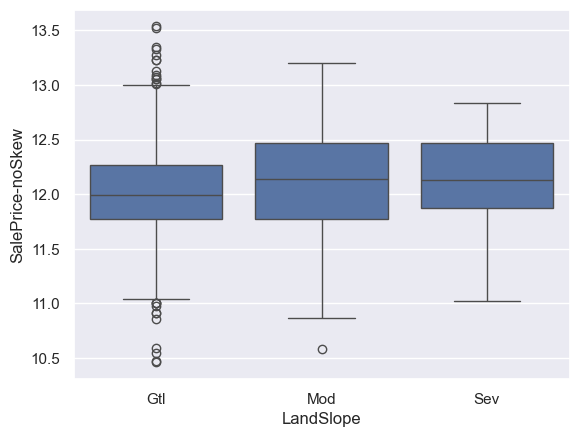

In [144]:
sns.boxplot(x=categorical_columns['LandSlope'],y=train['SalePrice-noSkew'])

In [145]:
categorical_columns['LandSlope']=categorical_columns['LandSlope'].replace(['Sev','Mod'],'Sev & Mod')
categorical_columns['LandSlope'].value_counts()

LandSlope
Gtl          1382
Sev & Mod      78
Name: count, dtype: int64

## Neighborhood

In [146]:
categorical_columns['Neighborhood'].value_counts()

Neighborhood
NAmes      225
CollgCr    150
OldTown    113
Edwards    100
Somerst     86
Gilbert     79
NridgHt     77
Sawyer      74
NWAmes      73
SawyerW     59
BrkSide     58
Crawfor     51
Mitchel     49
NoRidge     41
Timber      38
IDOTRR      37
ClearCr     28
StoneBr     25
SWISU       25
MeadowV     17
Blmngtn     17
BrDale      16
Veenker     11
NPkVill      9
Blueste      2
Name: count, dtype: int64

<Axes: xlabel='Neighborhood', ylabel='SalePrice-noSkew'>

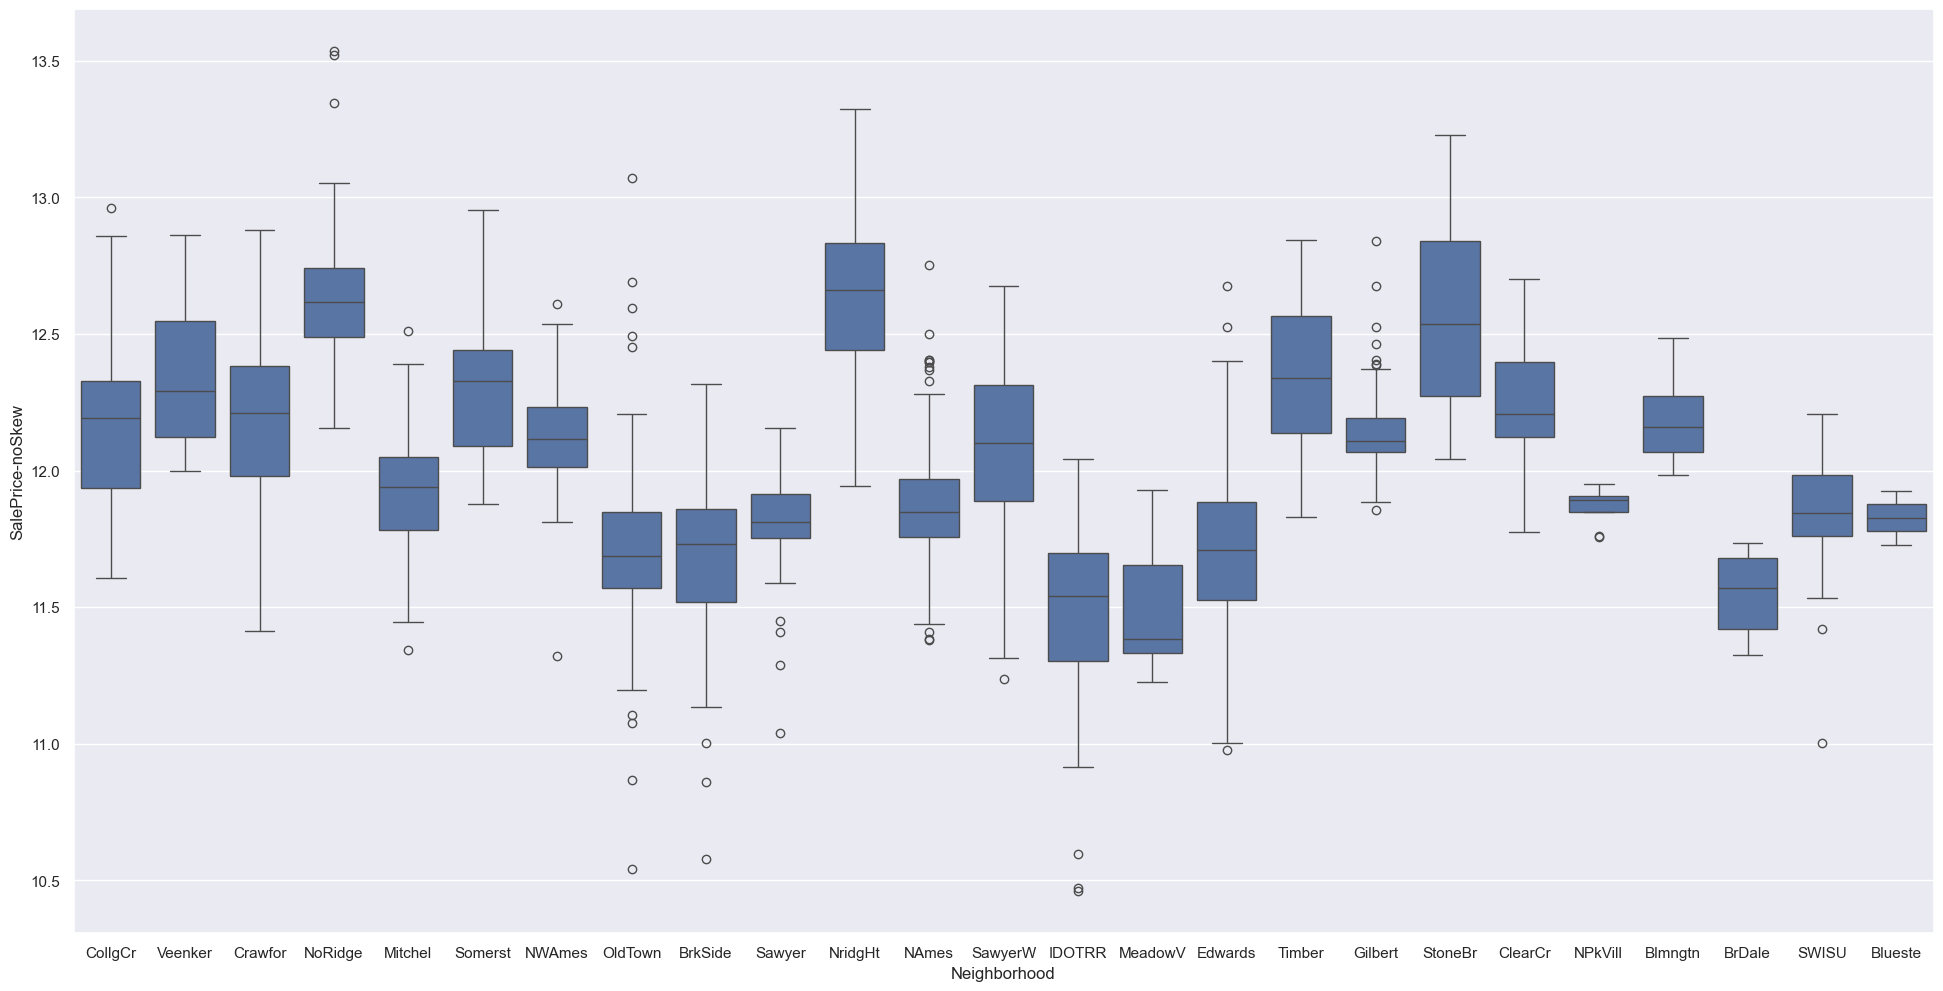

In [147]:
plt.figure(figsize=(24,12))
sns.boxplot(x=categorical_columns['Neighborhood'],y=train['SalePrice-noSkew'])

In [148]:
categorical_columns['Neighborhood']=categorical_columns['Neighborhood'].replace(['Blmngtn','Blueste','BrDale','MeadowV','NPkVill','Veenker'],'other')
categorical_columns['Neighborhood'].value_counts()

Neighborhood
NAmes      225
CollgCr    150
OldTown    113
Edwards    100
Somerst     86
Gilbert     79
NridgHt     77
Sawyer      74
NWAmes      73
other       72
SawyerW     59
BrkSide     58
Crawfor     51
Mitchel     49
NoRidge     41
Timber      38
IDOTRR      37
ClearCr     28
StoneBr     25
SWISU       25
Name: count, dtype: int64

<Axes: xlabel='Neighborhood', ylabel='SalePrice-noSkew'>

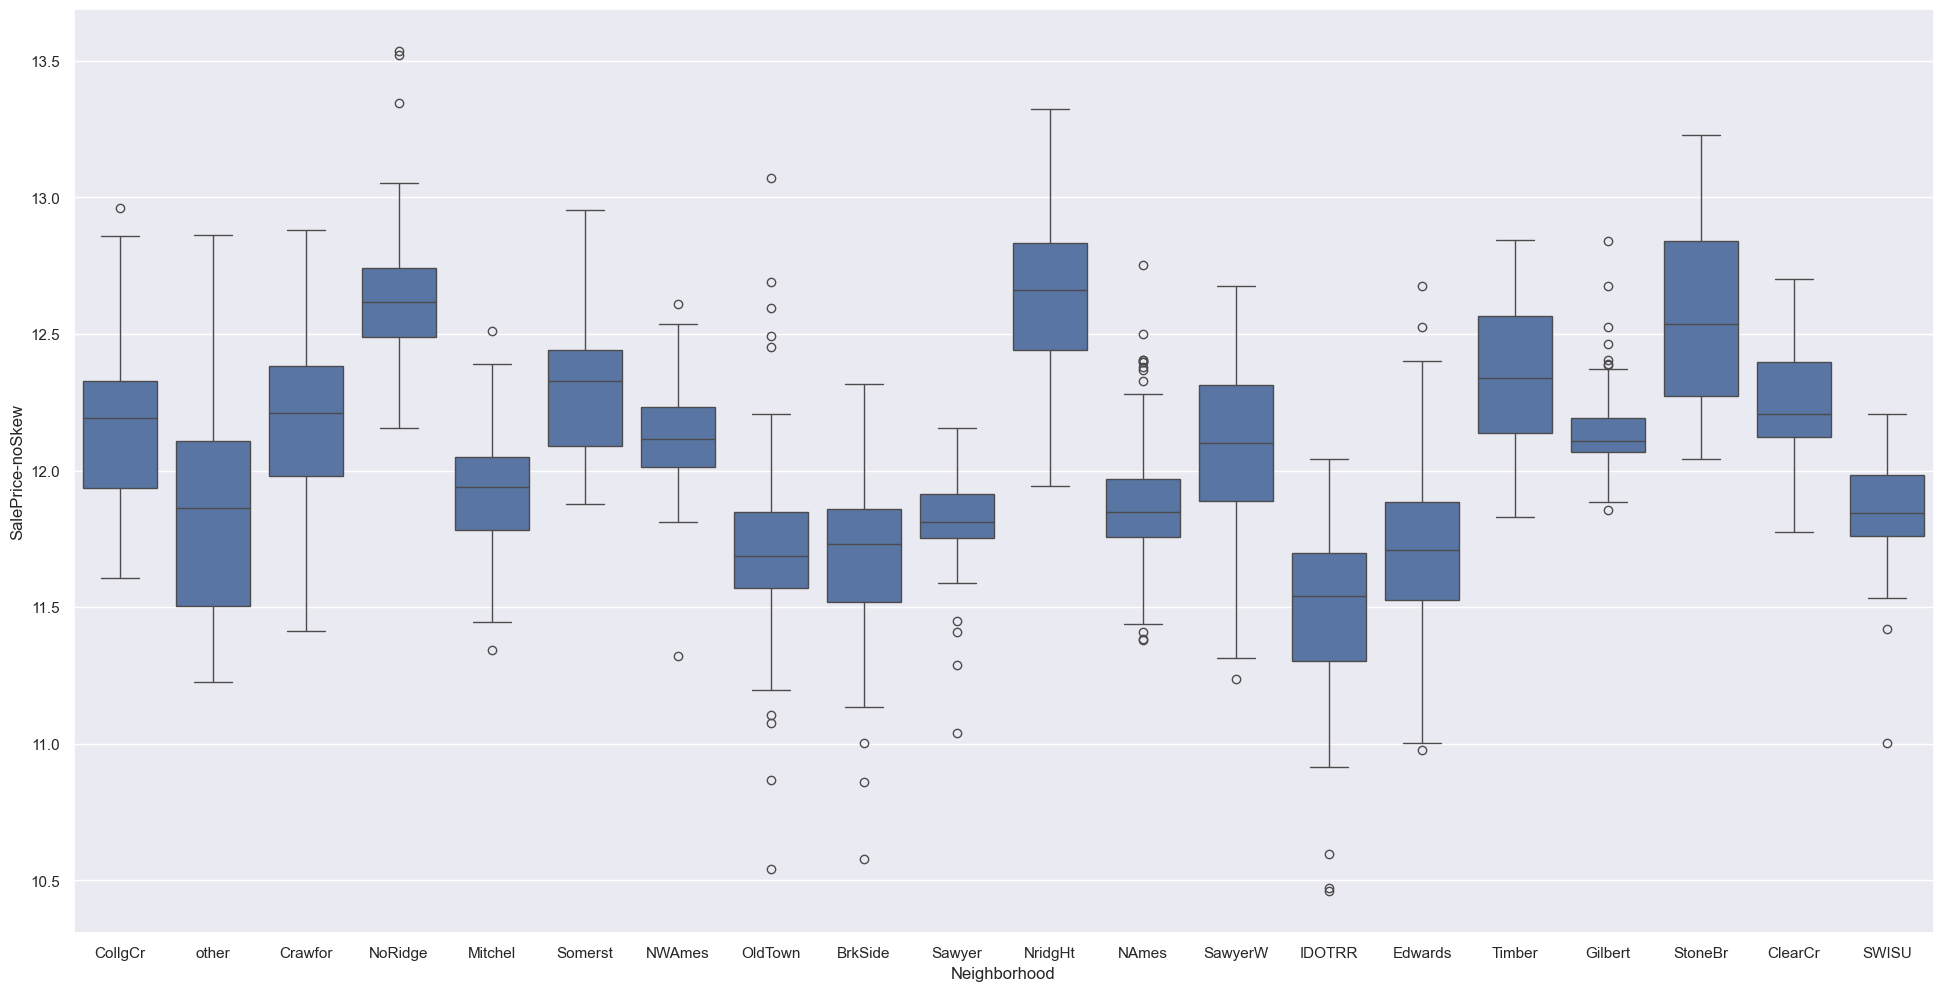

In [149]:
plt.figure(figsize=(24,12))
sns.boxplot(x=categorical_columns['Neighborhood'],y=train['SalePrice-noSkew'])

## Condition 1

In [150]:
categorical_columns['Condition1'].value_counts()

Condition1
Norm      1260
Feedr       81
Artery      48
RRAn        26
PosN        19
RRAe        11
PosA         8
RRNn         5
RRNe         2
Name: count, dtype: int64

<Axes: xlabel='Condition1', ylabel='SalePrice-noSkew'>

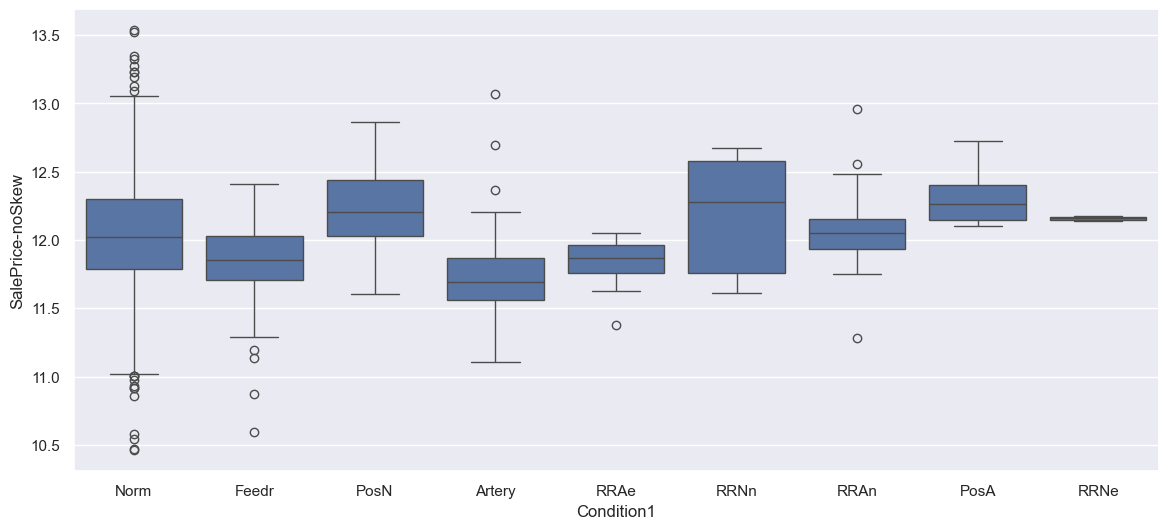

In [151]:
plt.figure(figsize=(14,6))
sns.boxplot(x=categorical_columns['Condition1'],y=train['SalePrice-noSkew'])

In [152]:
categorical_columns['Condition1']=categorical_columns['Condition1'].replace(['RRNe','RRNn','RRAe','RRAn'],'NearRailroad')

In [153]:
categorical_columns['Condition1']=categorical_columns['Condition1'].replace(['PosA','PosN'],'NearPositiveFeature')

In [154]:
categorical_columns['Condition1'].value_counts()

Condition1
Norm                   1260
Feedr                    81
Artery                   48
NearRailroad             44
NearPositiveFeature      27
Name: count, dtype: int64

## Condition 2

In [155]:
categorical_columns['Condition2'].value_counts()

Condition2
Norm      1445
Feedr        6
Artery       2
RRNn         2
PosN         2
PosA         1
RRAn         1
RRAe         1
Name: count, dtype: int64

since this feature have very little information about other categories i will drop it

In [156]:
categorical_columns=categorical_columns.drop('Condition2',axis=1)

## House Style

In [157]:
categorical_columns['HouseStyle'].value_counts()

HouseStyle
1Story    726
2Story    445
1.5Fin    154
SLvl       65
SFoyer     37
1.5Unf     14
2.5Unf     11
2.5Fin      8
Name: count, dtype: int64

<Axes: xlabel='HouseStyle', ylabel='SalePrice-noSkew'>

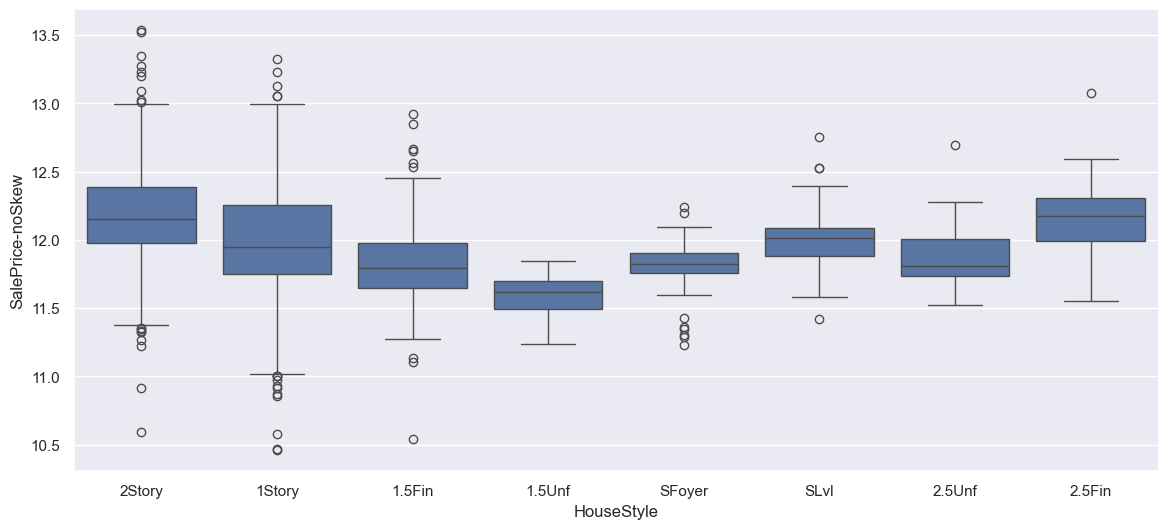

In [158]:
plt.figure(figsize=(14,6))
sns.boxplot(x=categorical_columns['HouseStyle'],y=train['SalePrice-noSkew'])

In [159]:
categorical_columns['HouseStyle']=categorical_columns['HouseStyle'].replace(['1.5Unf','2.5Fin','2.5Unf','1.5Fin'],'more_than_one_story')

In [160]:
categorical_columns['HouseStyle'].value_counts()

HouseStyle
1Story                 726
2Story                 445
more_than_one_story    187
SLvl                    65
SFoyer                  37
Name: count, dtype: int64

## RoofStyle

In [161]:
categorical_columns['RoofStyle'].value_counts()

RoofStyle
Gable      1141
Hip         286
Flat         13
Gambrel      11
Mansard       7
Shed          2
Name: count, dtype: int64

i replace Flat and Gmabrel and Mansard and Shed to Gable or Hip base on how they related to each one more

In [162]:
categorical_columns['RoofStyle']=categorical_columns['RoofStyle'].replace(['Hip','Flat','Mansard'],'Hip')
categorical_columns['RoofStyle']=categorical_columns['RoofStyle'].replace(['Gable','Gambrel','Shed'],'Gable')

In [163]:
categorical_columns['RoofStyle'].value_counts()

RoofStyle
Gable    1154
Hip       306
Name: count, dtype: int64

## RoofMatle

In [164]:
categorical_columns['RoofMatl'].value_counts()

RoofMatl
CompShg    1434
Tar&Grv      11
WdShngl       6
WdShake       5
Metal         1
Membran       1
Roll          1
ClyTile       1
Name: count, dtype: int64

I'll drop this column - you know why (;

In [165]:
categorical_columns=categorical_columns.drop('RoofMatl',axis=1)

## Exterior1st

In [166]:
categorical_columns['Exterior1st'].value_counts()

Exterior1st
VinylSd    515
HdBoard    222
MetalSd    220
Wd Sdng    206
Plywood    108
CemntBd     61
BrkFace     50
WdShing     26
Stucco      25
AsbShng     20
BrkComm      2
Stone        2
AsphShn      1
ImStucc      1
CBlock       1
Name: count, dtype: int64

<Axes: xlabel='Exterior1st', ylabel='SalePrice-noSkew'>

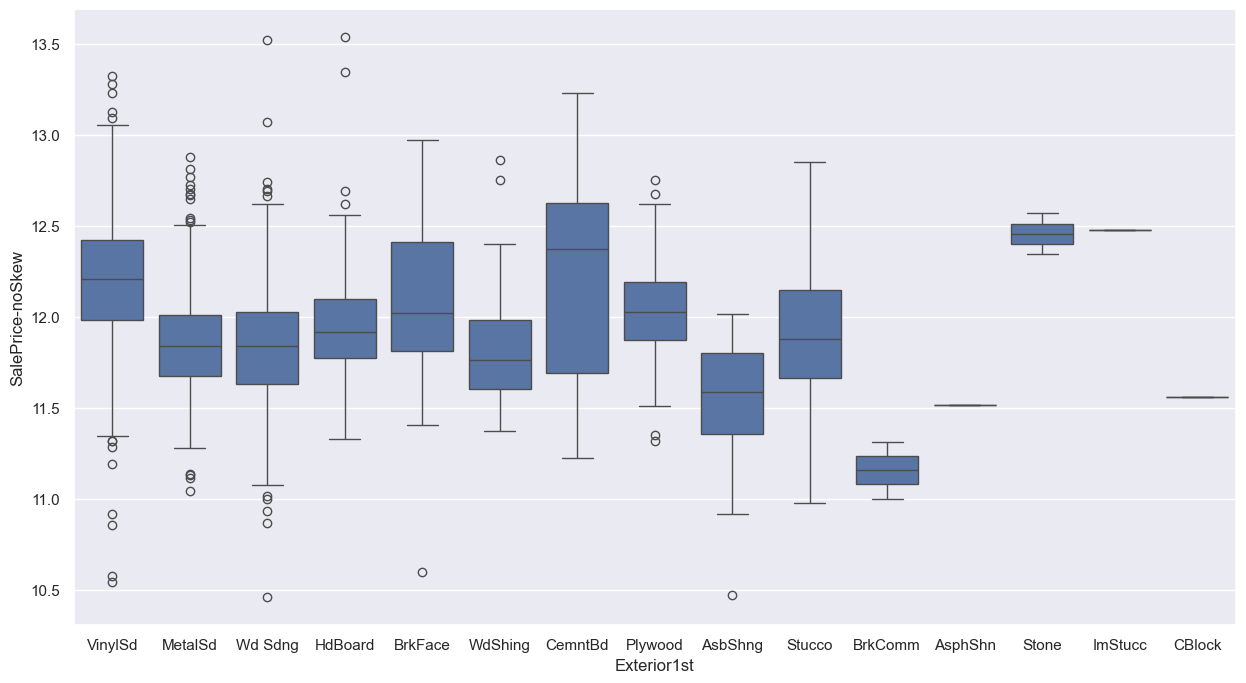

In [167]:
plt.figure(figsize=(15,8))
sns.boxplot(x=categorical_columns['Exterior1st'],y=train['SalePrice-noSkew'])

In [168]:
material_groups = {
    'HdBoard': 'Wood-Based',
    'Wd Sdng': 'Wood-Based',
    'Plywood': 'Wood-Based',
    'WdShing': 'Wood-Based',
    'BrkComm': 'Brick/Masonry',
    'BrkFace': 'Brick/Masonry',
    'Stone': 'Brick/Masonry',
    'VinylSd': 'Synthetic/Modern',
    'MetalSd': 'Synthetic/Modern',
    'CemntBd': 'Synthetic/Modern',
    'AsbShng': 'Synthetic/Modern',
    'Stucco': 'Stucco',
    'ImStucc': 'Stucco',
    'AsphShn': 'Synthetic/Modern',
    'CBlock': 'Synthetic/Modern'
}
categorical_columns['Exterior1st']=categorical_columns['Exterior1st'].map(material_groups)

<Axes: xlabel='Exterior1st', ylabel='SalePrice-noSkew'>

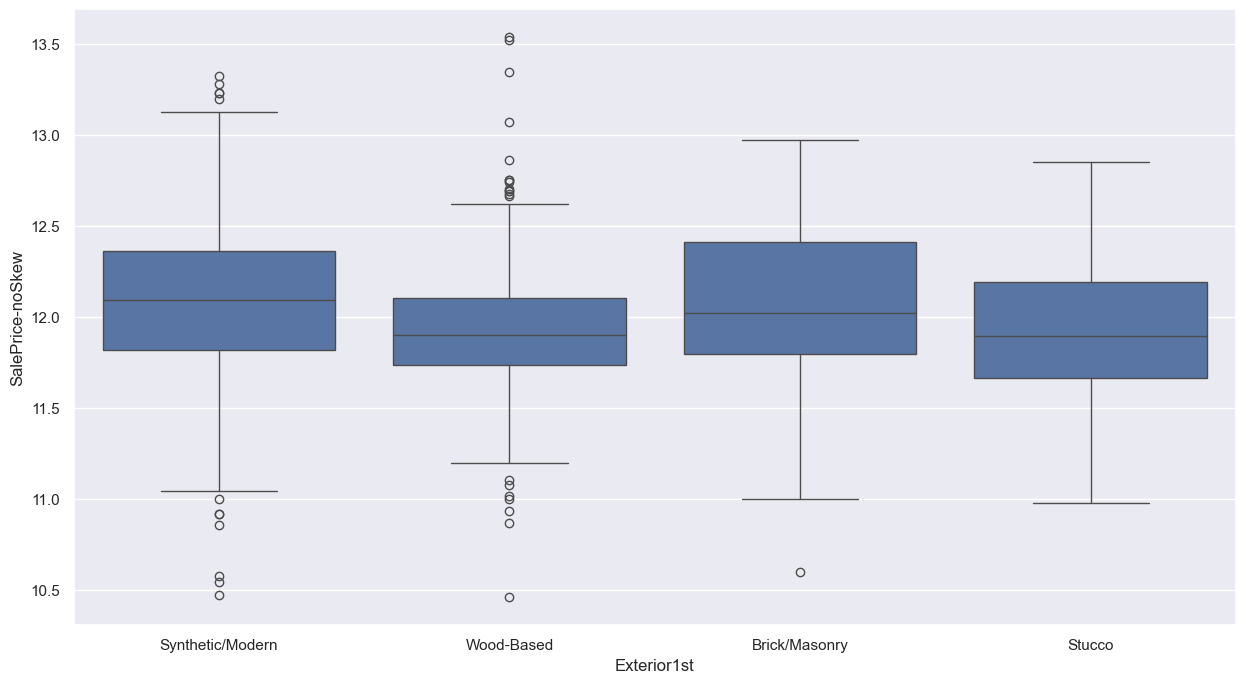

In [169]:
plt.figure(figsize=(15,8))
sns.boxplot(x=categorical_columns['Exterior1st'],y=train['SalePrice-noSkew'])

In [170]:
categorical_columns['Exterior1st'].value_counts()

Exterior1st
Synthetic/Modern    818
Wood-Based          562
Brick/Masonry        54
Stucco               26
Name: count, dtype: int64

## Exterior2nd

In [171]:
categorical_columns['Exterior2nd'].value_counts()

Exterior2nd
VinylSd    504
MetalSd    214
HdBoard    207
Wd Sdng    197
Plywood    142
CmentBd     60
Wd Shng     38
Stucco      26
BrkFace     25
AsbShng     20
ImStucc     10
Brk Cmn      7
Stone        5
AsphShn      3
Other        1
CBlock       1
Name: count, dtype: int64

In [172]:
categorical_columns['Exterior2nd']=categorical_columns['Exterior2nd'].replace(['Other','CBlock','AsphShn','Stone','Brk Cmn','ImStucc'],'other')
categorical_columns['Exterior2nd'].value_counts()

Exterior2nd
VinylSd    504
MetalSd    214
HdBoard    207
Wd Sdng    197
Plywood    142
CmentBd     60
Wd Shng     38
other       27
Stucco      26
BrkFace     25
AsbShng     20
Name: count, dtype: int64

## MasVnrType

In [173]:
categorical_columns['MasVnrType'].value_counts()

MasVnrType
noMasVnr    872
BrkFace     445
Stone       128
BrkCmn       15
Name: count, dtype: int64

<Axes: xlabel='MasVnrType', ylabel='SalePrice-noSkew'>

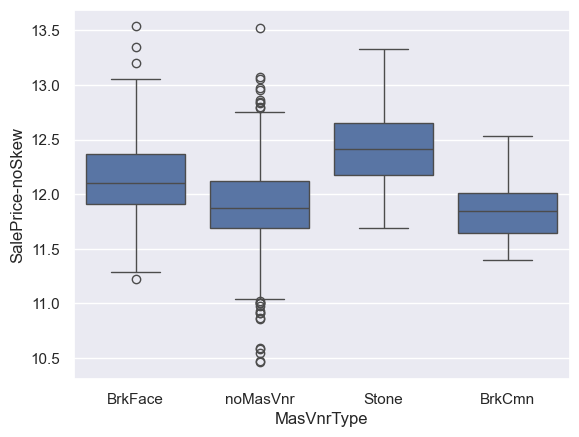

In [174]:
sns.boxplot(x=categorical_columns['MasVnrType'],y=train['SalePrice-noSkew'])

i combined BrkCmn and noMasVnr because for price they are very close together

In [175]:
categorical_columns['MasVnrType']=categorical_columns['MasVnrType'].replace(['noMasVnr','BrkCmn'],'None & BrkCmn')
categorical_columns['MasVnrType'].value_counts()

MasVnrType
None & BrkCmn    887
BrkFace          445
Stone            128
Name: count, dtype: int64

## ExterQual

In [176]:
categorical_columns['ExterQual'].value_counts()

ExterQual
TA    906
Gd    488
Ex     52
Fa     14
Name: count, dtype: int64

<Axes: xlabel='ExterQual', ylabel='SalePrice-noSkew'>

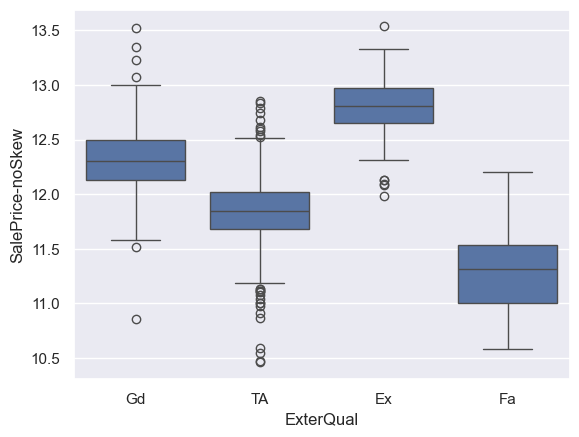

In [177]:
sns.boxplot(x=categorical_columns['ExterQual'],y=train['SalePrice-noSkew'])

i don't want to change this because i feel it is good for prediction and 14 observation is not very low i gues it can work but i will test it combining it via TA later if needed

## ExterCond

In [178]:
categorical_columns['ExterCond'].value_counts()

ExterCond
TA    1282
Gd     146
Fa      28
Ex       3
Po       1
Name: count, dtype: int64

<Axes: xlabel='ExterCond', ylabel='SalePrice-noSkew'>

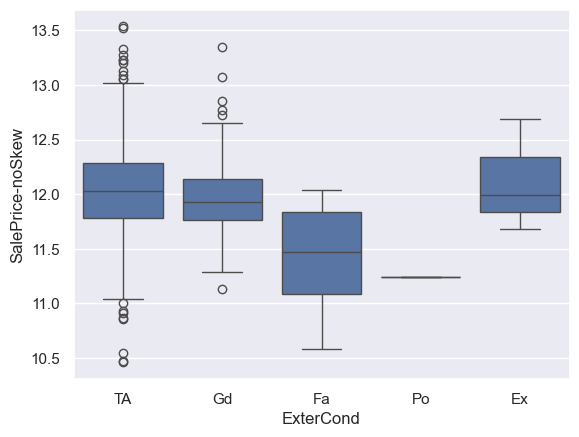

In [179]:
sns.boxplot(x=categorical_columns['ExterCond'],y=train['SalePrice-noSkew'])

In [180]:
categorical_columns['ExterCond']=categorical_columns['ExterCond'].replace(['Po','Fa'],'Fa & Po')
categorical_columns['ExterCond']=categorical_columns['ExterCond'].replace(['Gd','Ex'],'Gd & Ex')

In [181]:
categorical_columns['ExterCond'].value_counts()

ExterCond
TA         1282
Gd & Ex     149
Fa & Po      29
Name: count, dtype: int64

## Foundation

In [182]:
categorical_columns['Foundation'].value_counts()

Foundation
PConc     647
CBlock    634
BrkTil    146
Slab       24
Stone       6
Wood        3
Name: count, dtype: int64

<Axes: xlabel='Foundation', ylabel='SalePrice-noSkew'>

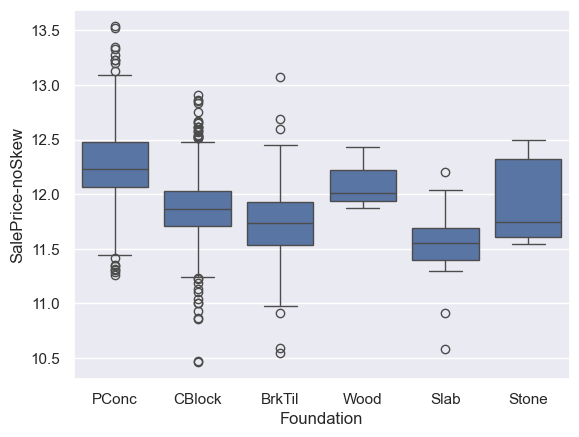

In [183]:
sns.boxplot(x=categorical_columns['Foundation'],y=train['SalePrice-noSkew'])

In [184]:
categorical_columns['Foundation']=categorical_columns['Foundation'].replace(['CBlock','Wood','Stone'],'CBlock')

## BsmtCond

In [185]:
categorical_columns['BsmtCond'].value_counts()

BsmtCond
TA            1311
Gd              65
Fa              45
noBasement      37
Po               2
Name: count, dtype: int64

<Axes: xlabel='BsmtCond', ylabel='SalePrice-noSkew'>

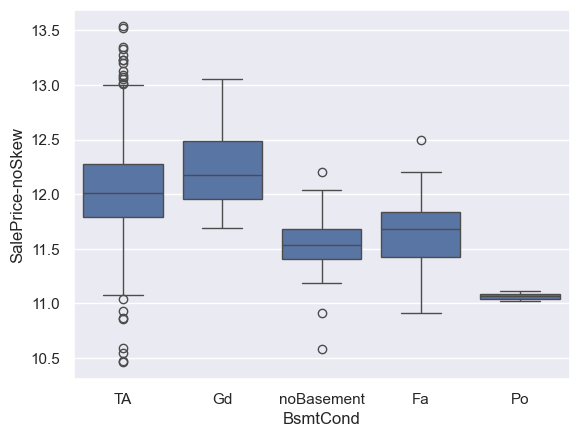

In [186]:
sns.boxplot(x=categorical_columns['BsmtCond'],y=train['SalePrice-noSkew'])

In [187]:
categorical_columns['BsmtCond']=categorical_columns['BsmtCond'].replace(['noBasement','Po'],'noBasement & Po')

## BsmtFinType2

In [188]:
categorical_columns['BsmtFinType2'].value_counts()

BsmtFinType2
Unf           1256
Rec             54
LwQ             46
noBasement      38
BLQ             33
ALQ             19
GLQ             14
Name: count, dtype: int64

<Axes: xlabel='BsmtFinType2', ylabel='SalePrice-noSkew'>

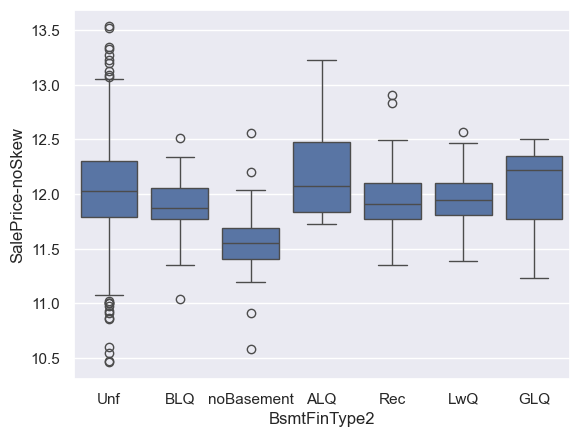

In [189]:
sns.boxplot(x=categorical_columns['BsmtFinType2'],y=train['SalePrice-noSkew'])

In [190]:
categorical_columns['BsmtFinType2']=categorical_columns['BsmtFinType2'].replace(['GLQ','ALQ'],'GLQ & ALQ')

## Heating

In [191]:
categorical_columns['Heating'].value_counts()

Heating
GasA     1428
GasW       18
Grav        7
Wall        4
OthW        2
Floor       1
Name: count, dtype: int64

i will delete this feature due to weak feature for prediction for having low observation for other categories in it

In [192]:
categorical_columns=categorical_columns.drop('Heating',axis=1)

## HeatingQC

In [193]:
categorical_columns['HeatingQC'].value_counts()

HeatingQC
Ex    741
TA    428
Gd    241
Fa     49
Po      1
Name: count, dtype: int64

In [194]:
categorical_columns['HeatingQC']=categorical_columns['HeatingQC'].replace('Po','Fa')

In [195]:
categorical_columns['HeatingQC'].value_counts()

HeatingQC
Ex    741
TA    428
Gd    241
Fa     50
Name: count, dtype: int64

## Electrical

In [196]:
categorical_columns['Electrical'].value_counts()

Electrical
SBrkr    1335
FuseA      94
FuseF      27
FuseP       3
Mix         1
Name: count, dtype: int64

In [197]:
categorical_columns['Electrical']=categorical_columns['Electrical'].apply(lambda x:x if x=='SBrkr' else 'other')

In [198]:
categorical_columns['Electrical'].value_counts()

Electrical
SBrkr    1335
other     125
Name: count, dtype: int64

## Functional

In [199]:
categorical_columns['Functional'].value_counts()

Functional
Typ     1360
Min2      34
Min1      31
Mod       15
Maj1      14
Maj2       5
Sev        1
Name: count, dtype: int64

In [200]:
categorical_columns['Functional'] = categorical_columns['Functional'].apply(lambda x: x if x == 'Typ' else 'other')

In [201]:
categorical_columns['Functional'].value_counts()

Functional
Typ      1360
other     100
Name: count, dtype: int64

## GarageType

In [202]:
categorical_columns['GarageType'].value_counts()

GarageType
Attchd      870
Detchd      387
BuiltIn      88
noGarage     81
Basment      19
CarPort       9
2Types        6
Name: count, dtype: int64

<Axes: xlabel='GarageType', ylabel='SalePrice-noSkew'>

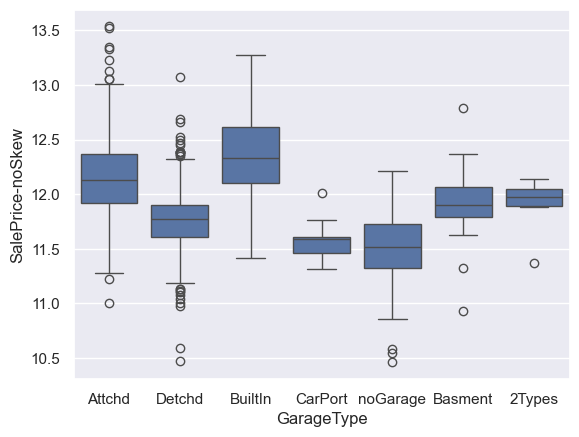

In [203]:
sns.boxplot(x=categorical_columns['GarageType'],y=train['SalePrice-noSkew'])

In [204]:
categorical_columns['GarageType']=categorical_columns['GarageType'].replace(['Basment','Attchd','2Types'],'Basment & Attchd & 2Types')
categorical_columns['GarageType']=categorical_columns['GarageType'].replace(['CarPort','noGarage'],'CarPort & noGarage')

In [205]:
categorical_columns['GarageType'].value_counts()

GarageType
Basment & Attchd & 2Types    895
Detchd                       387
CarPort & noGarage            90
BuiltIn                       88
Name: count, dtype: int64

In [206]:
categorical_columns.shape

(1460, 38)

## GarageQual

In [207]:
categorical_columns['GarageQual'].value_counts()

GarageQual
TA          1311
noGarage      81
Fa            48
Gd            14
Ex             3
Po             3
Name: count, dtype: int64

<Axes: xlabel='GarageQual', ylabel='SalePrice-noSkew'>

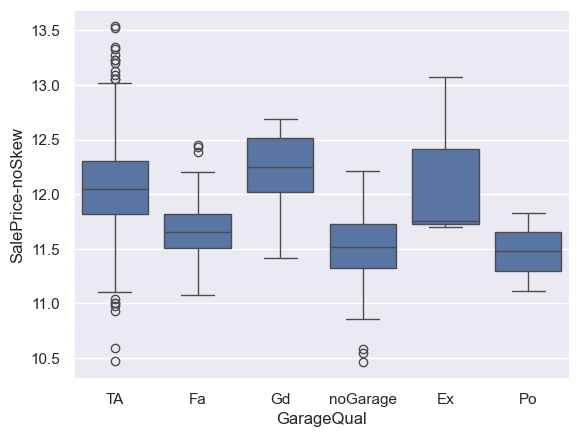

In [208]:
sns.boxplot(x=categorical_columns['GarageQual'],y=train['SalePrice-noSkew'])

In [209]:
categorical_columns['GarageQual']=categorical_columns['GarageQual'].replace(['TA','Ex'],'TA & Ex')

In [210]:
categorical_columns['GarageQual']=categorical_columns['GarageQual'].apply(lambda x:x if x=='TA & Ex' else 'other' )

In [211]:
categorical_columns['GarageQual'].value_counts()

GarageQual
TA & Ex    1314
other       146
Name: count, dtype: int64

<Axes: xlabel='GarageQual', ylabel='SalePrice-noSkew'>

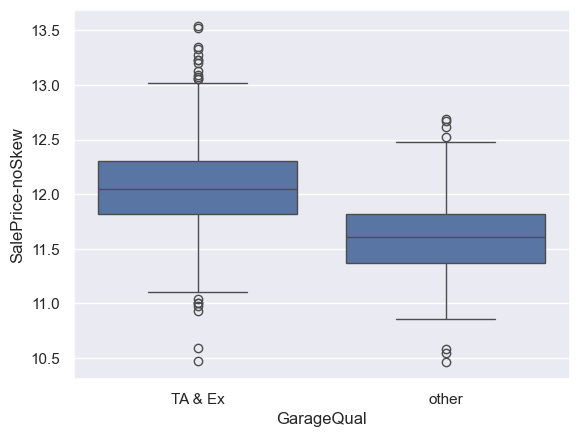

In [212]:
sns.boxplot(x=categorical_columns['GarageQual'],y=train['SalePrice-noSkew'])

## GarageCond

In [213]:
categorical_columns['GarageCond'].value_counts()

GarageCond
TA          1326
noGarage      81
Fa            35
Gd             9
Po             7
Ex             2
Name: count, dtype: int64

<Axes: xlabel='GarageCond', ylabel='SalePrice-noSkew'>

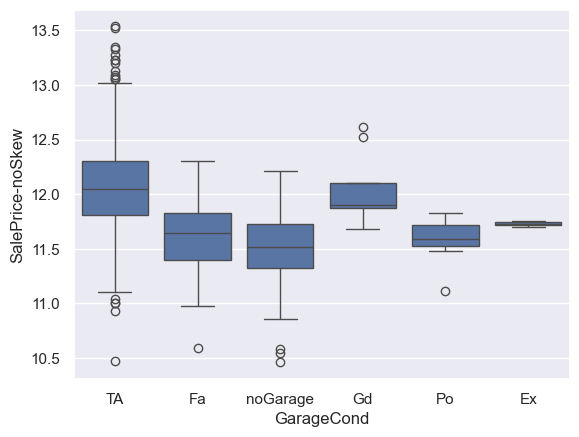

In [214]:
sns.boxplot(x=categorical_columns['GarageCond'],y=train['SalePrice-noSkew'])

In [215]:
categorical_columns['GarageCond']=categorical_columns['GarageCond'].apply(lambda x:x if x=='TA' else 'other')

In [216]:
categorical_columns['GarageCond'].value_counts()

GarageCond
TA       1326
other     134
Name: count, dtype: int64

## PoolQC

In [217]:
categorical_columns['PoolQC'].value_counts()

PoolQC
noPool    1453
Gd           3
Ex           2
Fa           2
Name: count, dtype: int64

In [218]:
categorical_columns=categorical_columns.drop('PoolQC',axis=1)

## Fence

In [219]:
categorical_columns['Fence'].value_counts()

Fence
noFence    1179
MnPrv       157
GdPrv        59
GdWo         54
MnWw         11
Name: count, dtype: int64

<Axes: xlabel='Fence', ylabel='SalePrice-noSkew'>

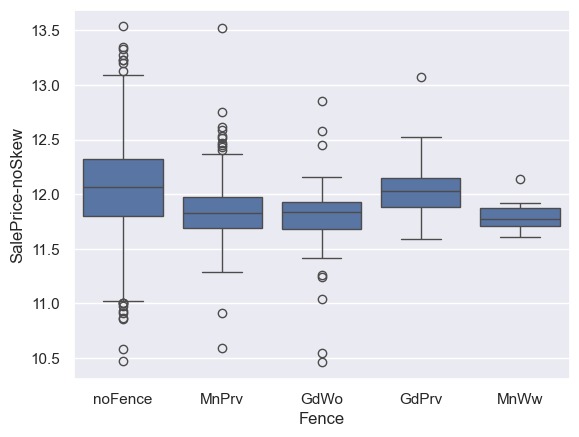

In [220]:
sns.boxplot(x=categorical_columns['Fence'],y=train['SalePrice-noSkew'])

In [221]:
categorical_columns['Fence']=categorical_columns['Fence'].replace(['GdWo','MnWw'],'GdWo & MnWw')

## MiscFeature

In [222]:
categorical_columns['MiscFeature'].value_counts()

MiscFeature
noMisc    1406
Shed        49
Gar2         2
Othr         2
TenC         1
Name: count, dtype: int64

In [223]:
categorical_columns=categorical_columns.drop('MiscFeature',axis=1)

## SaleType

In [224]:
categorical_columns['SaleType'].value_counts()

SaleType
WD       1267
New       122
COD        43
ConLD       9
ConLI       5
ConLw       5
CWD         4
Oth         3
Con         2
Name: count, dtype: int64

<Axes: xlabel='SaleType', ylabel='SalePrice-noSkew'>

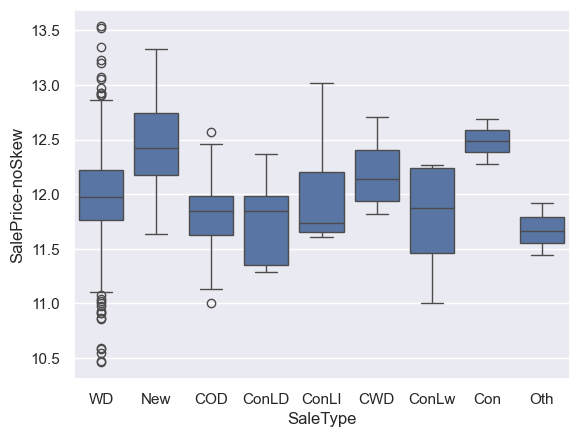

In [225]:
sns.boxplot(x=categorical_columns['SaleType'],y=train['SalePrice-noSkew'])

In [226]:
categorical_columns['SaleType']=categorical_columns['SaleType'].apply(lambda x:x if x in ['WD','New'] else 'COD & other')

In [227]:
categorical_columns['SaleType'].value_counts()

SaleType
WD             1267
New             122
COD & other      71
Name: count, dtype: int64

<Axes: xlabel='SaleType', ylabel='SalePrice-noSkew'>

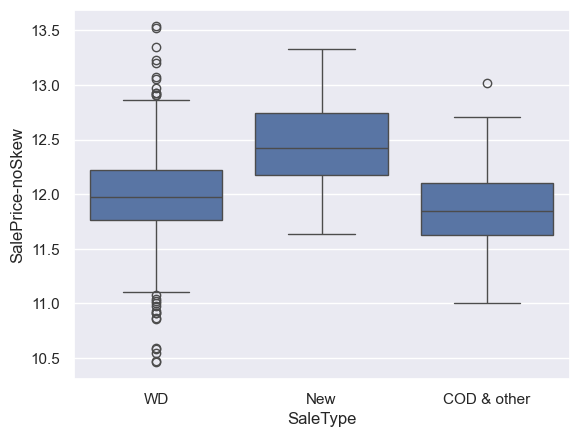

In [228]:
sns.boxplot(x=categorical_columns['SaleType'],y=train['SalePrice-noSkew'])

## SaleCondition

In [229]:
categorical_columns['SaleCondition'].value_counts()

SaleCondition
Normal     1198
Partial     125
Abnorml     101
Family       20
Alloca       12
AdjLand       4
Name: count, dtype: int64

<Axes: xlabel='SaleCondition', ylabel='SalePrice-noSkew'>

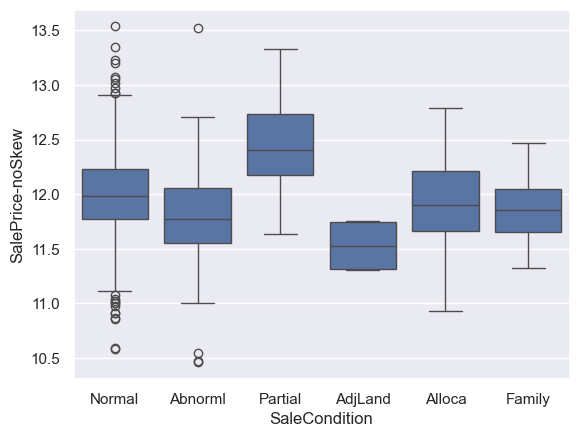

In [230]:
sns.boxplot(x=categorical_columns['SaleCondition'],y=train['SalePrice-noSkew'])

In [231]:
counts=categorical_columns['SaleCondition'].value_counts()

In [232]:
counts['Normal']

1198

In [233]:
categorical_columns['SaleCondition']=categorical_columns['SaleCondition'].apply(lambda x:x if counts[x]>=20 else 'Normal')

In [234]:
categorical_columns['SaleCondition'].value_counts()

SaleCondition
Normal     1214
Partial     125
Abnorml     101
Family       20
Name: count, dtype: int64

In [235]:
categorical_columns.to_csv('categorical_finished.csv')

# Performing ANOVA
i wanna check p-value & F-statistic to see if the difference between categories in categorical features are reliable and statistically significant 

In [236]:
# from scipy.stats import f_oneway
# 
# groups = [
#     train['SalePrice'][categorical_columns['Alley'] == 'noAlley'],
#     train['SalePrice'][categorical_columns['Alley'] == 'Grvl'],
#     train['SalePrice'][categorical_columns['Alley'] == 'Pave'],
# ]
# f_stat, p_value = f_oneway(*groups)
# print(f'P-value: {p_value}')

In [237]:
# groups = [
#     train['SalePrice'][categorical_columns['LotShape'] == 'Reg'],
#     train['SalePrice'][categorical_columns['LotShape'] == 'IR1'],
#     train['SalePrice'][categorical_columns['LotShape'] == 'IR2'],
#     train['SalePrice'][categorical_columns['LotShape'] == 'IR3'],
# ]
# f_stat, p_value = f_oneway(*groups)
# print(f'P-value: {p_value}')

In [238]:
from scipy.stats import f_oneway
anova_results = []

for columns in categorical_columns.columns:
    groups = [train['SalePrice-noSkew'][categorical_columns[columns] == feature] for feature in categorical_columns[columns].unique()]
    f_stat, p_value = f_oneway(*groups)
    anova_results.append({'Feature': columns, 'F-statistic': f_stat, 'P-value': p_value})
anova_results_df=pd.DataFrame(anova_results)
# anova_results_df=anova_results_df[anova_results_df['P-value']<0.05]
anova_results_df=anova_results_df.sort_values(by='F-statistic',ascending=False)
# anova_results_df[anova_results_df['Feature']=='Street']
anova_results_df

,Feature,F-statistic,P-value
14,ExterQual,415.304259,6.930372e-195
25,KitchenQual,393.320922,4.438817e-187
17,BsmtQual,300.392915,2.029970e-188
29,GarageFinish,298.769591,4.058066e-151
28,GarageType,236.745295,4.264812e-125
31,GarageCond,225.208263,1.903697e-47
16,Foundation,210.844724,1.451632e-113
23,CentralAir,205.666008,9.859878e-44
30,GarageQual,185.636772,7.047308e-40
13,MasVnrType,168.694184,1.265183e-66


## Selected Categorical features due to anova test
sorted by best to worst:

ExterQual, KitchenQual, BsmtQual, GarageFinish, GarageType, GarageCond, Foundation, CentralAir, GarageQual, MasVnrType, Electrical, HeatingQC, FireplaceQu

### Now i want to convert them to dummy variables and check .corr() function and see if any of them are very correlated with each other or not

In [239]:
# List of selected features
features = ['ExterQual', 'KitchenQual', 'BsmtQual', 'GarageFinish', 'GarageType', 
            'GarageCond', 'Foundation', 'CentralAir', 'GarageQual', 
            'MasVnrType', 'Electrical', 'HeatingQC', 'FireplaceQu']

# One-hot encode the features
encoded_data = pd.get_dummies(categorical_columns[features], drop_first=True)

# Compute the correlation matrix
correlation_matrix = encoded_data.corr()

In [240]:
correlation_matrix

,ExterQual_Fa,ExterQual_Gd,ExterQual_TA,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,BsmtQual_Fa,BsmtQual_Gd,BsmtQual_TA,BsmtQual_noBasement,...,MasVnrType_Stone,Electrical_other,HeatingQC_Fa,HeatingQC_Gd,HeatingQC_TA,FireplaceQu_Fa,FireplaceQu_Gd,FireplaceQu_Po,FireplaceQu_TA,FireplaceQu_noFireplace
ExterQual_Fa,1.000000,-0.069720,-0.125831,0.332410,-0.080570,-0.014731,0.076475,-0.070073,0.039274,0.073574,...,-0.030502,0.120607,0.097410,0.013045,0.029272,-0.014963,-0.042348,0.048869,-0.051401,0.075789
ExterQual_Gd,-0.069720,1.000000,-0.906121,-0.117385,0.628363,-0.617598,-0.101554,0.500864,-0.511130,-0.105016,...,0.216738,-0.211627,-0.133430,-0.142964,-0.376567,-0.039370,0.172026,-0.083505,0.096873,-0.219955
ExterQual_TA,-0.125831,-0.906121,1.000000,0.059515,-0.557605,0.671600,0.094868,-0.421378,0.543294,0.099149,...,-0.301599,0.203966,0.123970,0.157589,0.407461,0.052439,-0.243863,0.080013,-0.055826,0.262431
KitchenQual_Fa,0.332410,-0.117385,0.059515,1.000000,-0.135653,-0.166805,0.085118,-0.107540,0.082610,0.081400,...,-0.051356,0.237764,0.155664,-0.005008,0.061283,-0.025193,-0.040183,0.017021,-0.055490,0.089922
KitchenQual_Gd,-0.080570,0.628363,-0.557605,-0.135653,1.000000,-0.824457,-0.110058,0.449540,-0.392243,-0.096472,...,0.126605,-0.205611,-0.115777,-0.051679,-0.367700,-0.011706,0.122539,-0.072457,0.089789,-0.162179
KitchenQual_TA,-0.014731,-0.617598,0.671600,-0.166805,-0.824457,1.000000,0.084006,-0.357990,0.447369,0.090418,...,-0.244312,0.152129,0.089102,0.094740,0.410885,0.040433,-0.231971,0.081691,-0.028613,0.229493
BsmtQual_Fa,0.076475,-0.101554,0.094868,0.085118,-0.110058,0.084006,1.000000,-0.134266,-0.140197,-0.025271,...,-0.048582,0.144087,-0.004891,0.123300,-0.012397,-0.023833,-0.052143,-0.018470,-0.038225,0.093805
BsmtQual_Gd,-0.070073,0.500864,-0.421378,-0.107540,0.449540,-0.357990,-0.134266,1.000000,-0.766391,-0.138145,...,0.053032,-0.217560,-0.115593,-0.074729,-0.213685,-0.027687,-0.024799,-0.041334,0.251692,-0.150133
BsmtQual_TA,0.039274,-0.511130,0.543294,0.082610,-0.392243,0.447369,-0.140197,-0.766391,1.000000,-0.144248,...,-0.213951,0.169638,0.096817,0.099767,0.302030,0.067984,-0.097124,0.060591,-0.161669,0.205082
BsmtQual_noBasement,0.073574,-0.105016,0.099149,0.081400,-0.096472,0.090418,-0.025271,-0.138145,-0.144248,1.000000,...,-0.049986,0.153146,0.113418,-0.001262,0.068486,-0.024521,-0.055920,0.018490,-0.052376,0.091777


## Heatmap for this correlation matrix for seeing better the correlations

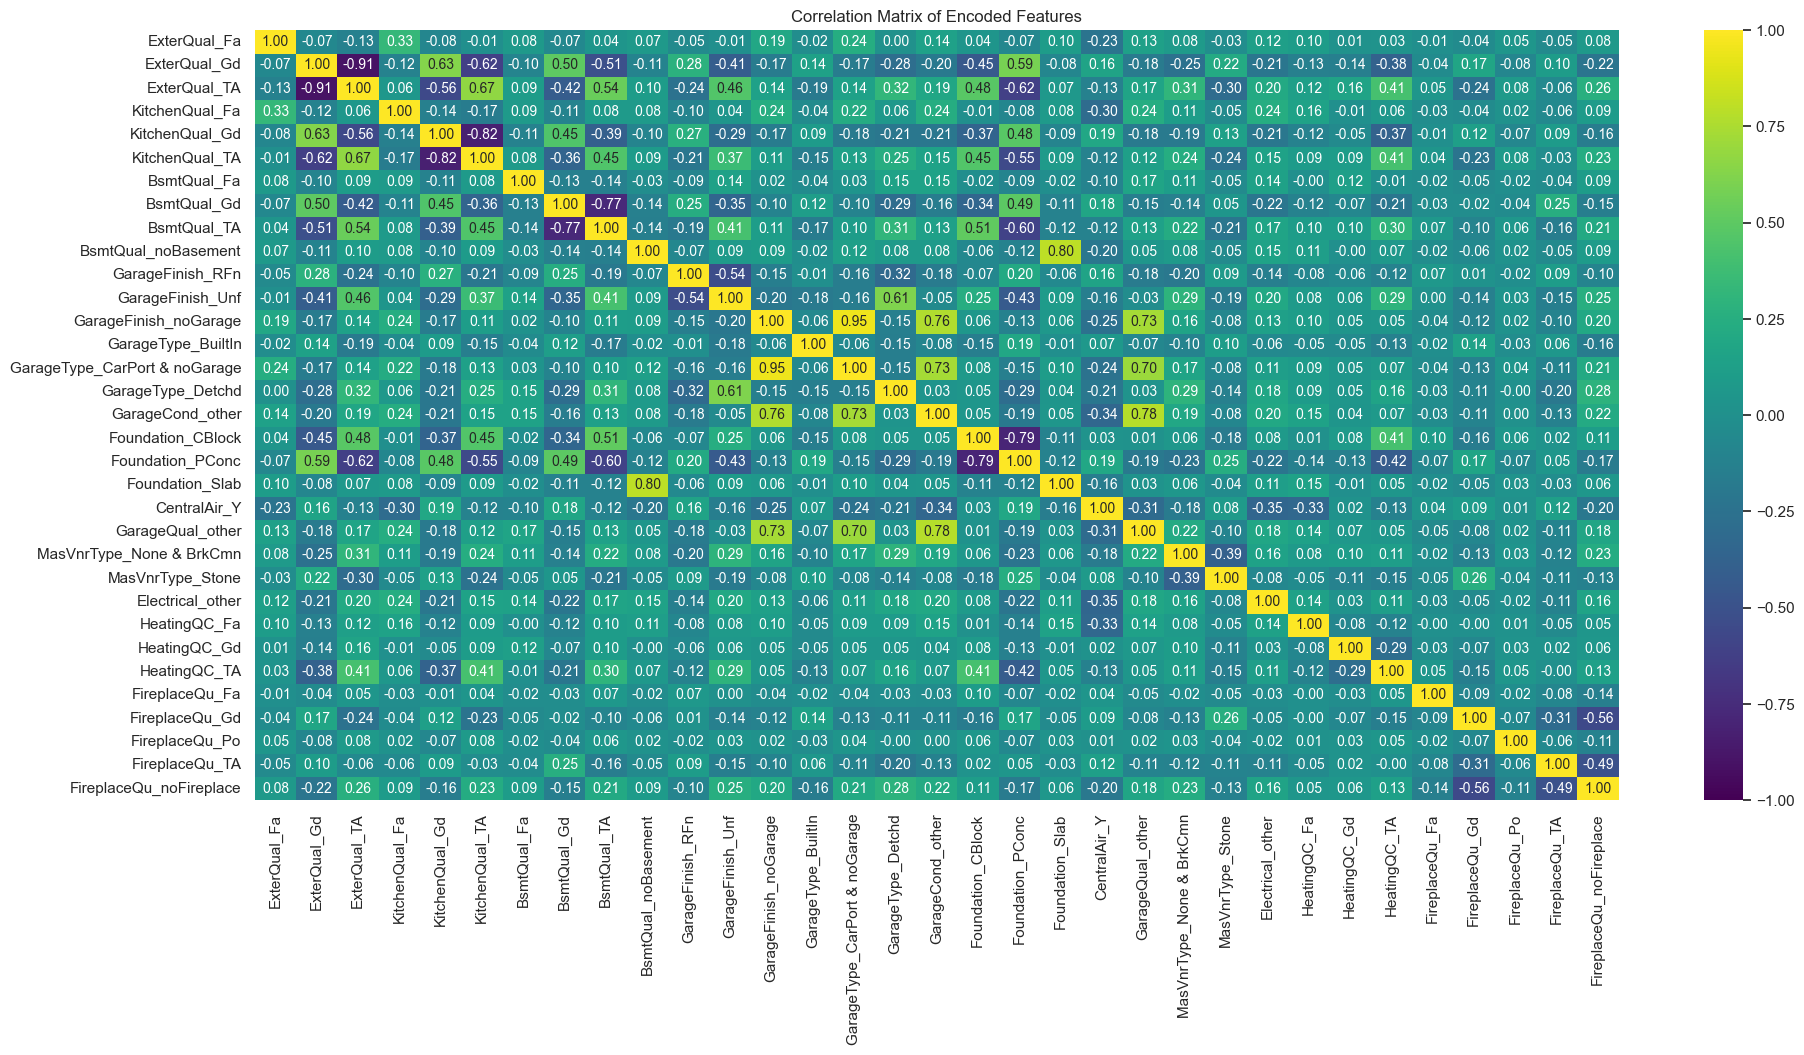

In [241]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plot the heatmap
plt.figure(figsize=(22, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='viridis', fmt=".2f", vmin=-1, vmax=1,cbar=True,annot_kws={"size": 10})
plt.title('Correlation Matrix of Encoded Features')
plt.show()

Checking for these 4 garage features to decide which ones to keep 'GarageFinish', 'GarageType','GarageCond', 'GarageQual'

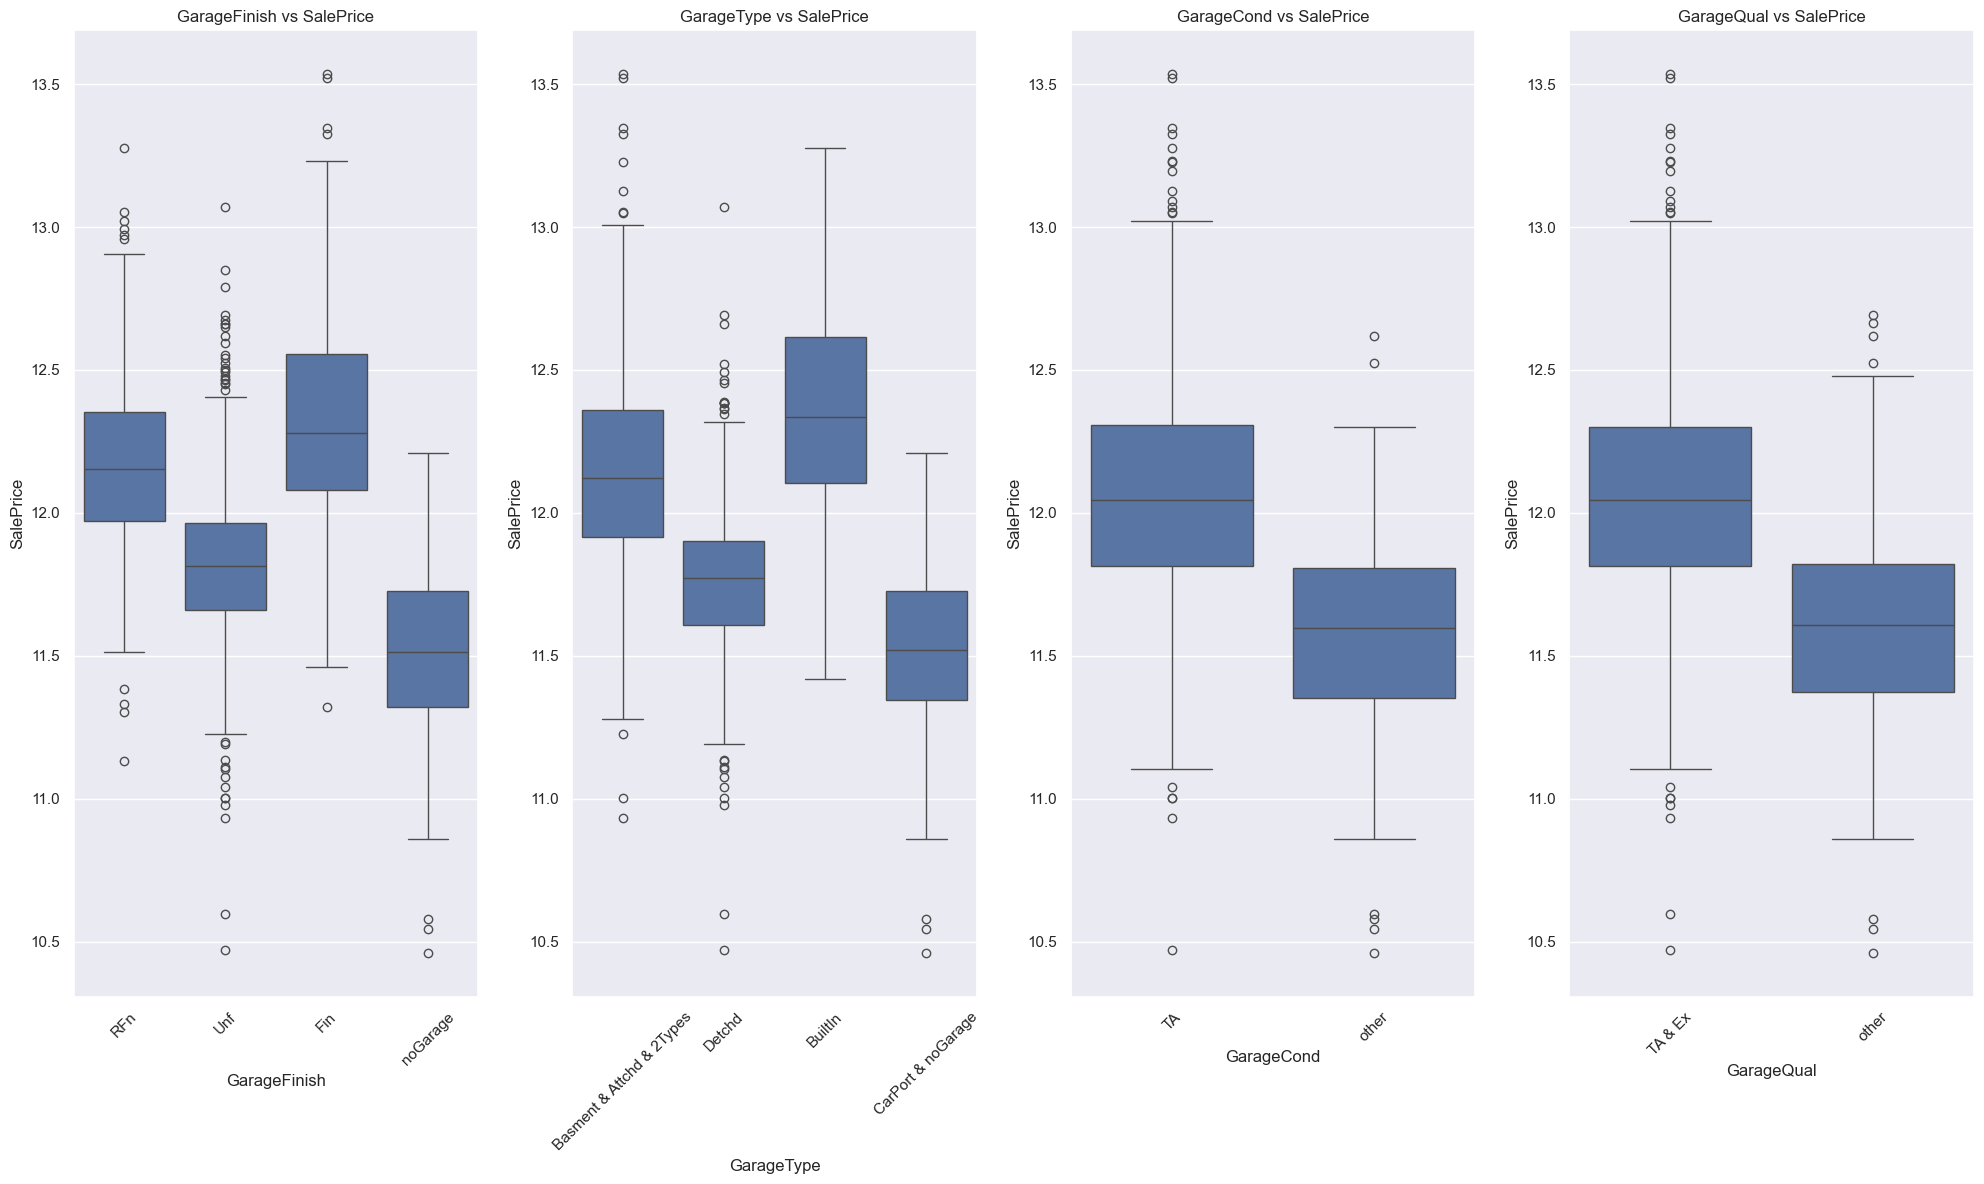

In [242]:
import math
features = ['GarageFinish', 'GarageType', 
            'GarageCond', 'GarageQual', ]
num_features=len(features)
cols=4
rows=math.ceil(num_features/cols)

fig,axes=plt.subplots(nrows=rows,ncols=cols,figsize=(20,12))
axes=axes.flatten()

for i,feature in enumerate(features):
    sns.boxplot(x=categorical_columns[feature],y=train['SalePrice-noSkew'],ax=axes[i])
    axes[i].set_title(f'{feature} vs SalePrice')
    axes[i].set_xlabel(feature)
    axes[i].set_ylabel('SalePrice')
    axes[i].tick_params(axis='x', rotation=45)
for i in range(len(features), len(axes)):
    fig.delaxes(axes[i])
    
plt.tight_layout()
plt.show()

as it shown i should keep one of feature between (GarageFinish & GarageType) and (GarageCond & GarageQual)

In [243]:
anova_results_df[anova_results_df['Feature'].isin(['GarageFinish' , 'GarageType','GarageCond', 'GarageQual'])]

,Feature,F-statistic,P-value
29,GarageFinish,298.769591,4.058066e-151
28,GarageType,236.745295,4.264812e-125
31,GarageCond,225.208263,1.903697e-47
30,GarageQual,185.636772,7.047308e-40


i'll keep GarageCond and Garage Finish

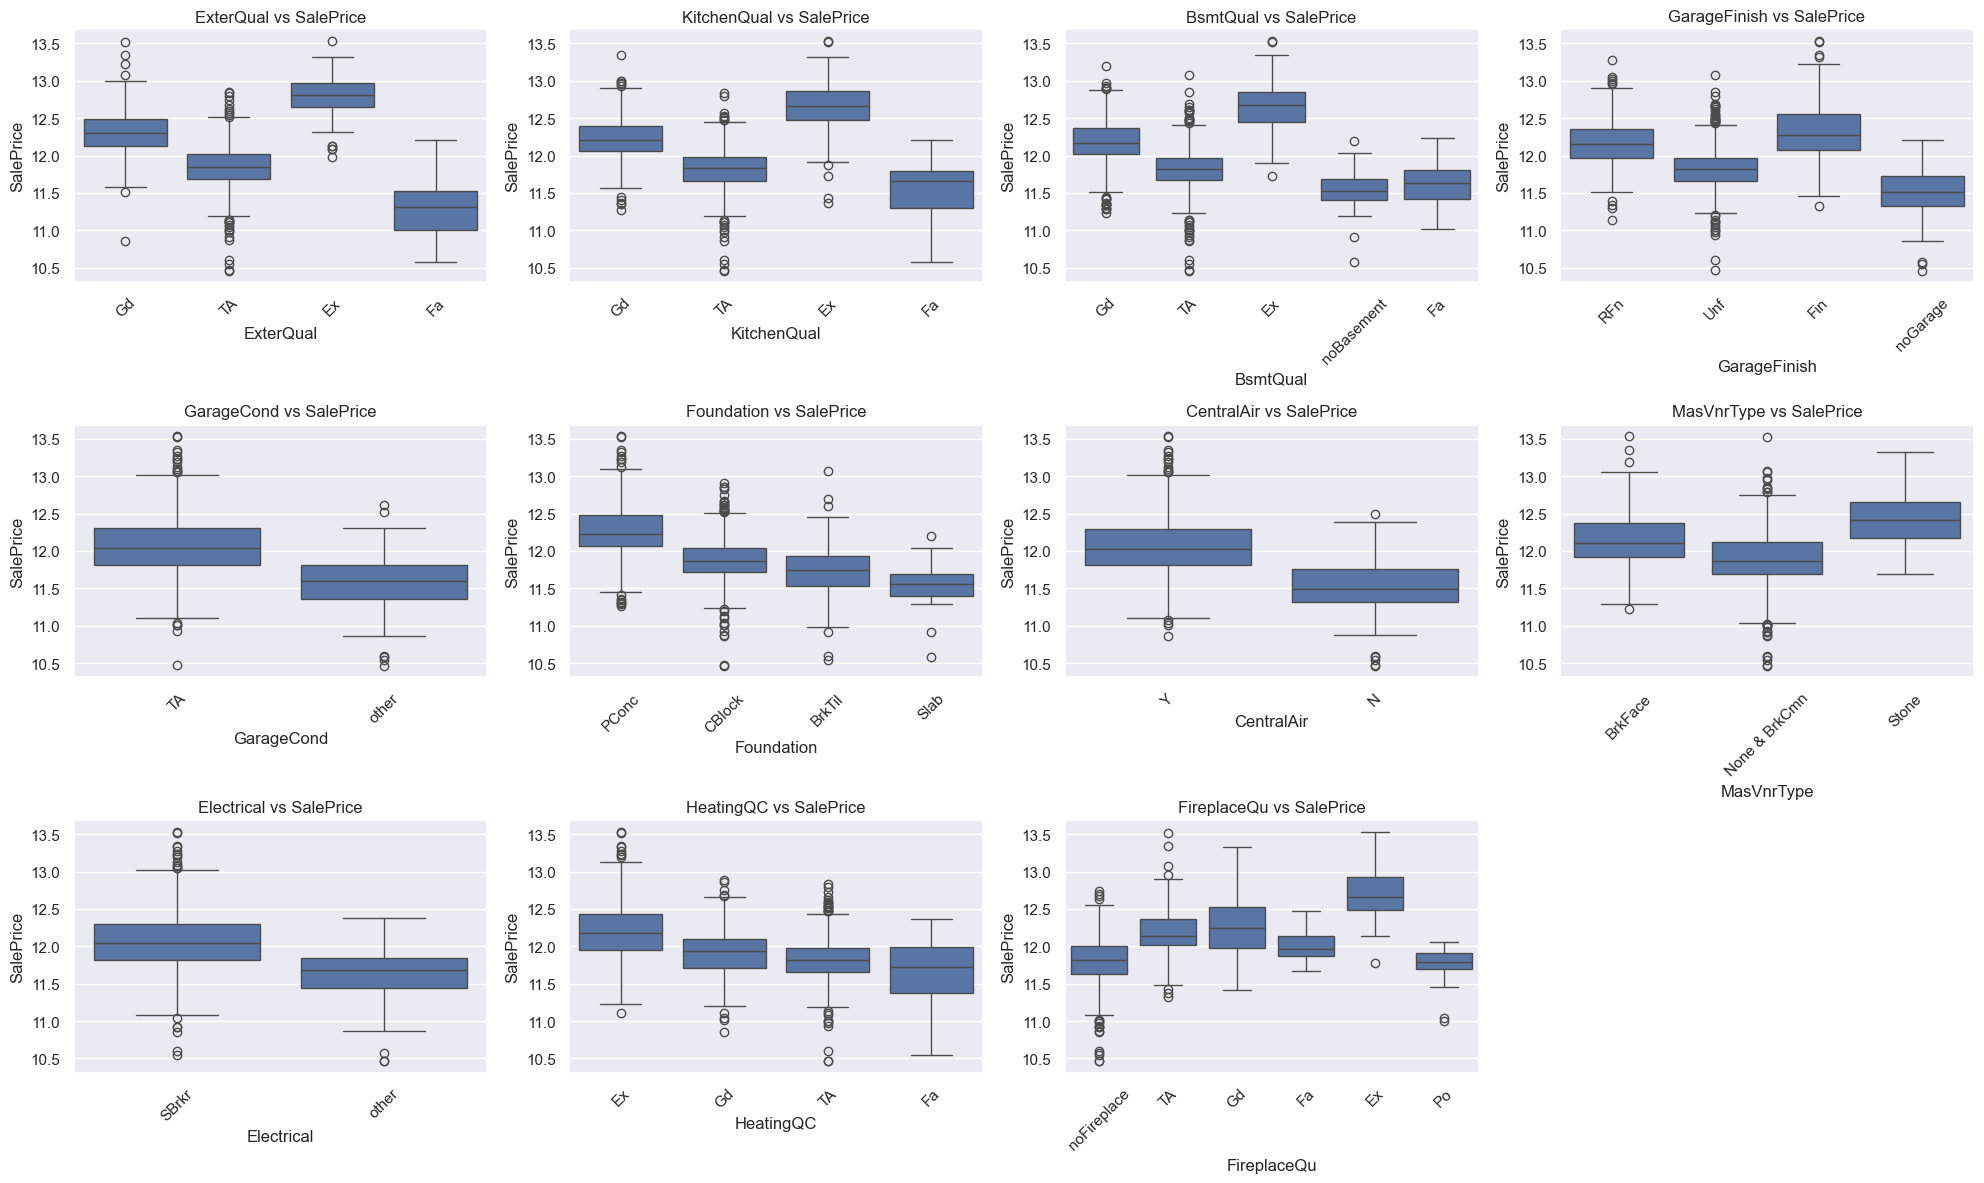

In [244]:

import math
features=['ExterQual', 'KitchenQual', 'BsmtQual', 'GarageFinish', 
            'GarageCond', 'Foundation', 'CentralAir',
            'MasVnrType', 'Electrical', 'HeatingQC', 'FireplaceQu']
num_features=len(features)
cols=4
rows=math.ceil(num_features/cols)

fig,axes=plt.subplots(nrows=rows,ncols=cols,figsize=(20,12))
axes=axes.flatten()

for i,feature in enumerate(features):
    sns.boxplot(x=categorical_columns[feature],y=train['SalePrice-noSkew'],ax=axes[i])
    axes[i].set_title(f'{feature} vs SalePrice')
    axes[i].set_xlabel(feature)
    axes[i].set_ylabel('SalePrice')
    axes[i].tick_params(axis='x', rotation=45)
for i in range(len(features), len(axes)):
    fig.delaxes(axes[i])
    
plt.tight_layout()
plt.show()

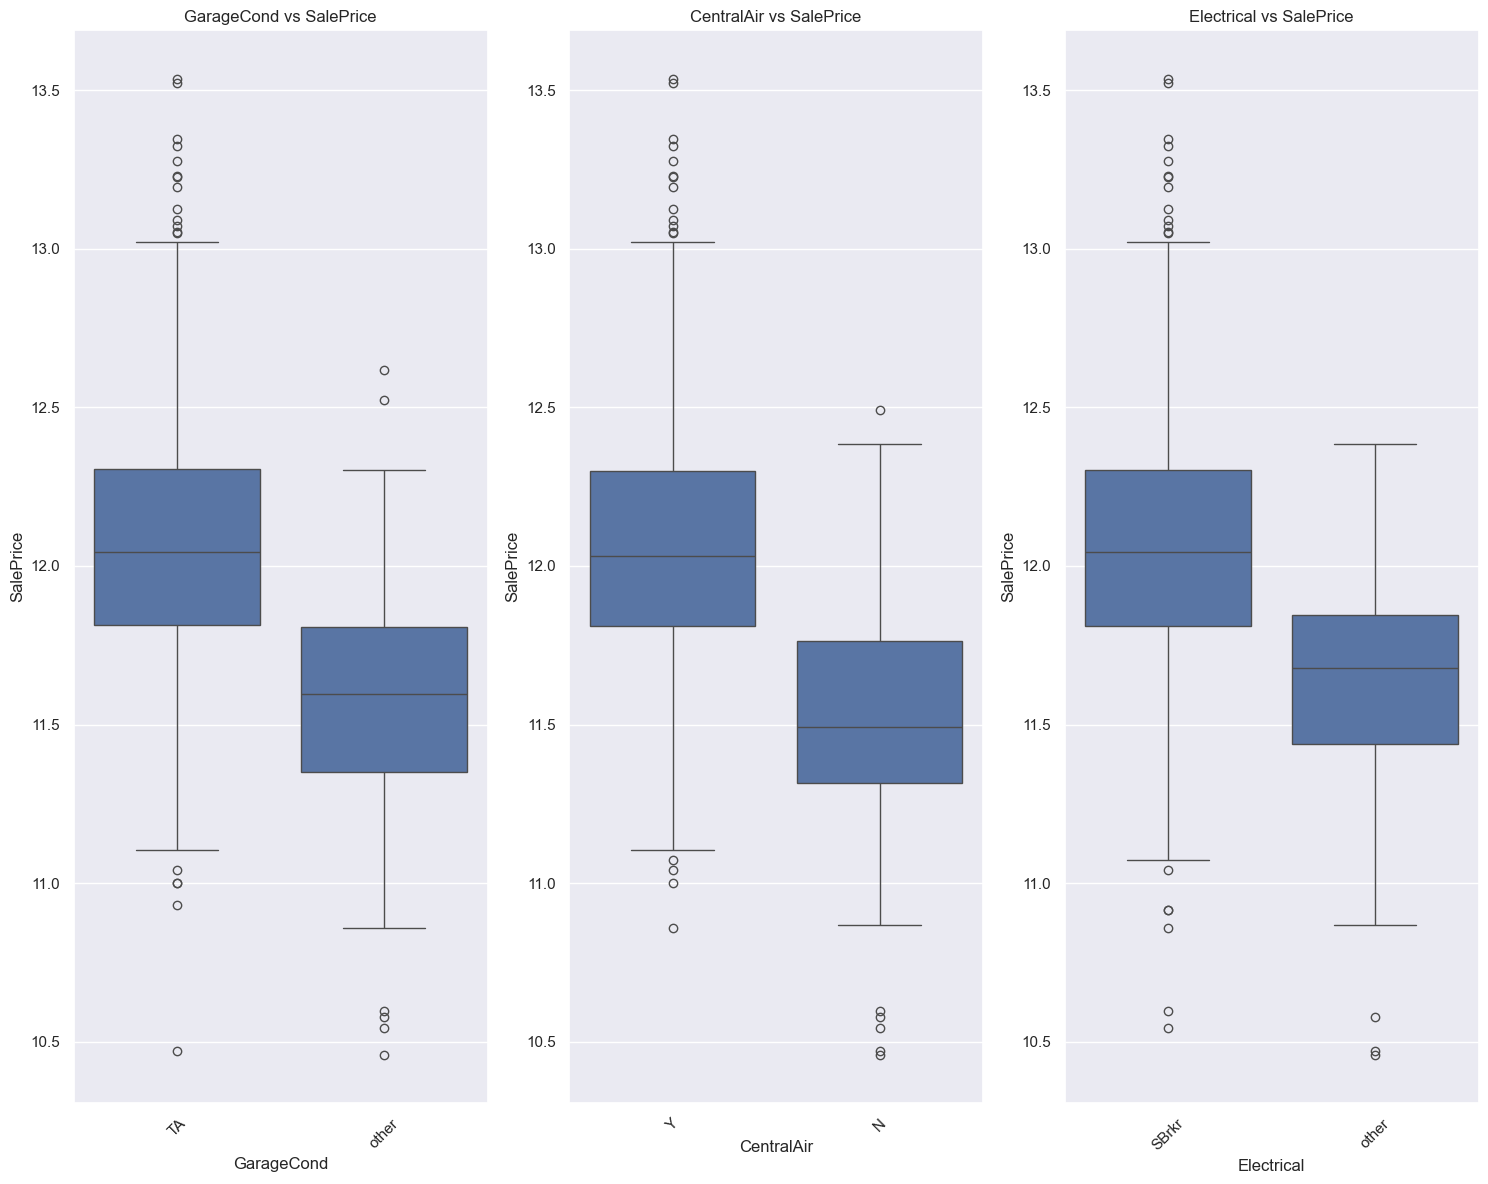

In [245]:
import math
features=[
            'GarageCond', 'CentralAir',
            'Electrical',]
num_features=len(features)
cols=4
rows=math.ceil(num_features/cols)

fig,axes=plt.subplots(nrows=rows,ncols=cols,figsize=(20,12))
axes=axes.flatten()

for i,feature in enumerate(features):
    sns.boxplot(x=categorical_columns[feature],y=train['SalePrice-noSkew'],ax=axes[i])
    axes[i].set_title(f'{feature} vs SalePrice')
    axes[i].set_xlabel(feature)
    axes[i].set_ylabel('SalePrice')
    axes[i].tick_params(axis='x', rotation=45)
for i in range(len(features), len(axes)):
    fig.delaxes(axes[i])
    
plt.tight_layout()
plt.show()

In [246]:
categorical_columns['GarageCond'].value_counts()

GarageCond
TA       1326
other     134
Name: count, dtype: int64

In [247]:
categorical_columns['CentralAir'].value_counts()

CentralAir
Y    1365
N      95
Name: count, dtype: int64

In [248]:
categorical_columns['Electrical'].value_counts()

Electrical
SBrkr    1335
other     125
Name: count, dtype: int64

In [249]:
anova_results_df[anova_results_df['Feature'].isin(['GarageCond','CentralAir','Electrical'])]

,Feature,F-statistic,P-value
31,GarageCond,225.208263,1.903697e-47
23,CentralAir,205.666008,9.859878e-44
24,Electrical,150.616931,5.089869e-33


i also between these tree ill keep GarageCond

Features for keep until now = 'ExterQual', 'KitchenQual', 'BsmtQual', 'GarageFinish', 
            'GarageCond', 'Foundation',
            'MasVnrType', 'HeatingQC', 'FireplaceQu'

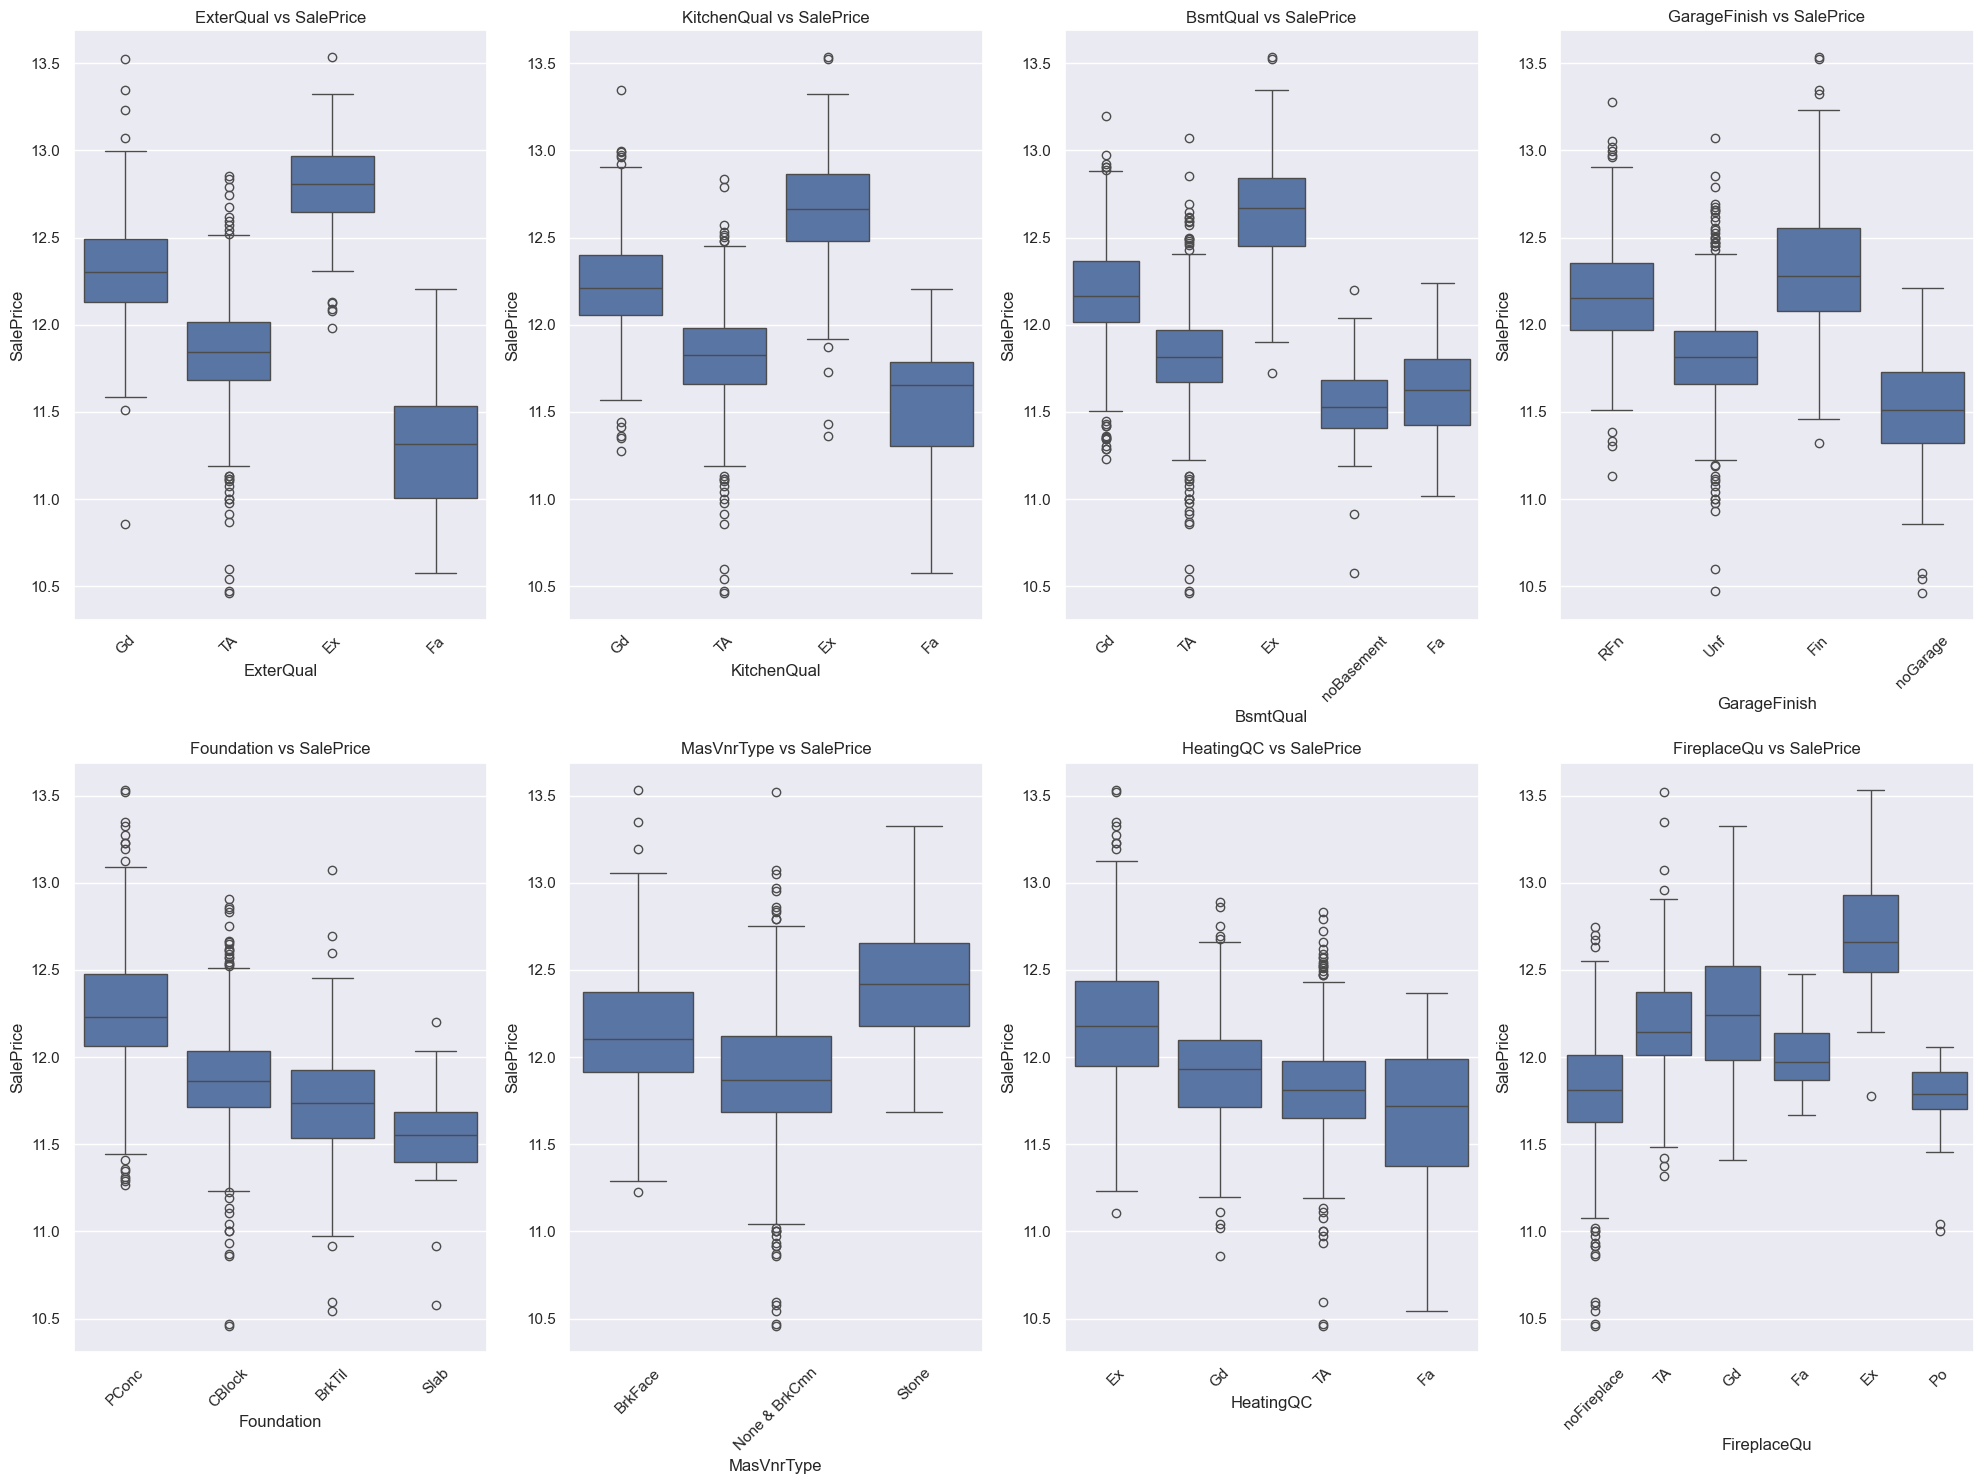

In [250]:
# box plots for features exclude GarageCOnd for seeing better
import math
features=['ExterQual', 'KitchenQual', 'BsmtQual', 'GarageFinish', 
         'Foundation',
            'MasVnrType', 'HeatingQC', 'FireplaceQu']
num_features=len(features)
cols=4
rows=math.ceil(num_features/cols)

fig,axes=plt.subplots(nrows=rows,ncols=cols,figsize=(20,15))
axes=axes.flatten()

for i,feature in enumerate(features):
    sns.boxplot(x=categorical_columns[feature],y=train['SalePrice-noSkew'],ax=axes[i])
    axes[i].set_title(f'{feature} vs SalePrice')
    axes[i].set_xlabel(feature)
    axes[i].set_ylabel('SalePrice')
    axes[i].tick_params(axis='x', rotation=45)
for i in range(len(features), len(axes)):
    fig.delaxes(axes[i])
    
plt.tight_layout()
plt.show()

In [251]:
anova_results_df

,Feature,F-statistic,P-value
14,ExterQual,415.304259,6.930372e-195
25,KitchenQual,393.320922,4.438817e-187
17,BsmtQual,300.392915,2.029970e-188
29,GarageFinish,298.769591,4.058066e-151
28,GarageType,236.745295,4.264812e-125
31,GarageCond,225.208263,1.903697e-47
16,Foundation,210.844724,1.451632e-113
23,CentralAir,205.666008,9.859878e-44
30,GarageQual,185.636772,7.047308e-40
13,MasVnrType,168.694184,1.265183e-66


In [252]:
# List of selected features
features_final = ['ExterQual', 'KitchenQual', 'BsmtQual', 'GarageFinish', 
            'GarageCond', 'Foundation',
            'MasVnrType', 'HeatingQC', 'FireplaceQu']

# One-hot encode the features
encoded_data_final = pd.get_dummies(categorical_columns[features_final], drop_first=True)

In [253]:
encoded_data_final

,ExterQual_Fa,ExterQual_Gd,ExterQual_TA,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,BsmtQual_Fa,BsmtQual_Gd,BsmtQual_TA,BsmtQual_noBasement,...,MasVnrType_None & BrkCmn,MasVnrType_Stone,HeatingQC_Fa,HeatingQC_Gd,HeatingQC_TA,FireplaceQu_Fa,FireplaceQu_Gd,FireplaceQu_Po,FireplaceQu_TA,FireplaceQu_noFireplace
0,False,True,False,False,True,False,False,True,False,False,...,False,False,False,False,False,False,False,False,False,True
1,False,False,True,False,False,True,False,True,False,False,...,True,False,False,False,False,False,False,False,True,False
2,False,True,False,False,True,False,False,True,False,False,...,False,False,False,False,False,False,False,False,True,False
3,False,False,True,False,True,False,False,False,True,False,...,True,False,False,True,False,False,True,False,False,False
4,False,True,False,False,True,False,False,True,False,False,...,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,False,False,True,False,False,True,False,True,False,False,...,True,False,False,False,False,False,False,False,True,False
1456,False,False,True,False,False,True,False,True,False,False,...,False,True,False,False,True,False,False,False,True,False
1457,False,False,False,False,True,False,False,False,True,False,...,True,False,False,False,False,False,True,False,False,False
1458,False,False,True,False,True,False,False,False,True,False,...,True,False,False,True,False,False,False,False,False,True


In [254]:
train=train.select_dtypes(exclude=['object','bool']).copy()

In [255]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 39 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Id                1460 non-null   int64  
 1   MSSubClass        1460 non-null   int64  
 2   LotFrontage       1201 non-null   float64
 3   LotArea           1460 non-null   int64  
 4   OverallQual       1460 non-null   int64  
 5   OverallCond       1460 non-null   int64  
 6   YearBuilt         1460 non-null   int64  
 7   YearRemodAdd      1460 non-null   int64  
 8   MasVnrArea        1460 non-null   float64
 9   BsmtFinSF1        1460 non-null   int64  
 10  BsmtFinSF2        1460 non-null   int64  
 11  BsmtUnfSF         1460 non-null   int64  
 12  TotalBsmtSF       1460 non-null   int64  
 13  1stFlrSF          1460 non-null   int64  
 14  2ndFlrSF          1460 non-null   int64  
 15  LowQualFinSF      1460 non-null   int64  
 16  GrLivArea         1460 non-null   int64  


In [256]:
train=train.drop('SalePrice',axis=1)

In [257]:
train=pd.concat([train,encoded_data_final],axis=1)
train

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,MasVnrType_None & BrkCmn,MasVnrType_Stone,HeatingQC_Fa,HeatingQC_Gd,HeatingQC_TA,FireplaceQu_Fa,FireplaceQu_Gd,FireplaceQu_Po,FireplaceQu_TA,FireplaceQu_noFireplace
0,1,60,65.0,8450,7,5,2003,2003,196.0,706,...,False,False,False,False,False,False,False,False,False,True
1,2,20,80.0,9600,6,8,1976,1976,0.0,978,...,True,False,False,False,False,False,False,False,True,False
2,3,60,68.0,11250,7,5,2001,2002,162.0,486,...,False,False,False,False,False,False,False,False,True,False
3,4,70,60.0,9550,7,5,1915,1970,0.0,216,...,True,False,False,True,False,False,True,False,False,False
4,5,60,84.0,14260,8,5,2000,2000,350.0,655,...,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,62.0,7917,6,5,1999,2000,0.0,0,...,True,False,False,False,False,False,False,False,True,False
1456,1457,20,85.0,13175,6,6,1978,1988,119.0,790,...,False,True,False,False,True,False,False,False,True,False
1457,1458,70,66.0,9042,7,9,1941,2006,0.0,275,...,True,False,False,False,False,False,True,False,False,False
1458,1459,20,68.0,9717,5,6,1950,1996,0.0,49,...,True,False,False,True,False,False,False,False,False,True


In [258]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 65 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Id                        1460 non-null   int64  
 1   MSSubClass                1460 non-null   int64  
 2   LotFrontage               1201 non-null   float64
 3   LotArea                   1460 non-null   int64  
 4   OverallQual               1460 non-null   int64  
 5   OverallCond               1460 non-null   int64  
 6   YearBuilt                 1460 non-null   int64  
 7   YearRemodAdd              1460 non-null   int64  
 8   MasVnrArea                1460 non-null   float64
 9   BsmtFinSF1                1460 non-null   int64  
 10  BsmtFinSF2                1460 non-null   int64  
 11  BsmtUnfSF                 1460 non-null   int64  
 12  TotalBsmtSF               1460 non-null   int64  
 13  1stFlrSF                  1460 non-null   int64  
 14  2ndFlrSF

## Building the model

In [259]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [260]:
regressor = LinearRegression()
x = train.drop('SalePrice-noSkew',axis=1)
y = train['SalePrice-noSkew']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25)

## Filling missing Values for Numerical features

In [261]:
train.select_dtypes(exclude=['object','bool']).isna().sum()

Id                    0
MSSubClass            0
LotFrontage         259
LotArea               0
OverallQual           0
OverallCond           0
YearBuilt             0
YearRemodAdd          0
MasVnrArea            0
BsmtFinSF1            0
BsmtFinSF2            0
BsmtUnfSF             0
TotalBsmtSF           0
1stFlrSF              0
2ndFlrSF              0
LowQualFinSF          0
GrLivArea             0
BsmtFullBath          0
BsmtHalfBath          0
FullBath              0
HalfBath              0
BedroomAbvGr          0
KitchenAbvGr          0
TotRmsAbvGrd          0
Fireplaces            0
GarageYrBlt           0
GarageCars            0
GarageArea            0
WoodDeckSF            0
OpenPorchSF           0
EnclosedPorch         0
3SsnPorch             0
ScreenPorch           0
PoolArea              0
MiscVal               0
MoSold                0
YrSold                0
SalePrice-noSkew      0
dtype: int64

In [262]:
filled_LotFrontage=pd.read_csv('..\\Missing Values\\nm_LotFrontage.csv')
filled_LotFrontage

,Unnamed: 0,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


In [263]:
filled_LotFrontage.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 82 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Unnamed: 0     1460 non-null   int64  
 1   Id             1460 non-null   int64  
 2   MSSubClass     1460 non-null   int64  
 3   MSZoning       1460 non-null   object 
 4   LotFrontage    1460 non-null   float64
 5   LotArea        1460 non-null   int64  
 6   Street         1460 non-null   object 
 7   Alley          91 non-null     object 
 8   LotShape       1460 non-null   object 
 9   LandContour    1460 non-null   object 
 10  Utilities      1460 non-null   object 
 11  LotConfig      1460 non-null   object 
 12  LandSlope      1460 non-null   object 
 13  Neighborhood   1460 non-null   object 
 14  Condition1     1460 non-null   object 
 15  Condition2     1460 non-null   object 
 16  BldgType       1460 non-null   object 
 17  HouseStyle     1460 non-null   object 
 18  OverallQ

In [264]:
train['LotFrontage']=filled_LotFrontage['LotFrontage']
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 65 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Id                        1460 non-null   int64  
 1   MSSubClass                1460 non-null   int64  
 2   LotFrontage               1460 non-null   float64
 3   LotArea                   1460 non-null   int64  
 4   OverallQual               1460 non-null   int64  
 5   OverallCond               1460 non-null   int64  
 6   YearBuilt                 1460 non-null   int64  
 7   YearRemodAdd              1460 non-null   int64  
 8   MasVnrArea                1460 non-null   float64
 9   BsmtFinSF1                1460 non-null   int64  
 10  BsmtFinSF2                1460 non-null   int64  
 11  BsmtUnfSF                 1460 non-null   int64  
 12  TotalBsmtSF               1460 non-null   int64  
 13  1stFlrSF                  1460 non-null   int64  
 14  2ndFlrSF

In [265]:
train['MasVnrArea'].describe()

count    1460.000000
mean      103.117123
std       180.731373
min         0.000000
25%         0.000000
50%         0.000000
75%       164.250000
max      1600.000000
Name: MasVnrArea, dtype: float64

In [266]:
bins=[-1,0,100,2000]
binned_MasVnrArea=pd.cut(train['MasVnrArea'],bins=bins)
binned_MasVnrArea.value_counts()

MasVnrArea
(-1, 0]        869
(100, 2000]    472
(0, 100]       119
Name: count, dtype: int64

In [267]:
train['MasVnrArea']

0       196.0
1         0.0
2       162.0
3         0.0
4       350.0
        ...  
1455      0.0
1456    119.0
1457      0.0
1458      0.0
1459      0.0
Name: MasVnrArea, Length: 1460, dtype: float64

In [268]:
most_common=train['MasVnrArea'].mode()
most_common

0    0.0
Name: MasVnrArea, dtype: float64

In [269]:
train['MasVnrArea'].fillna(0,inplace=True)

In [270]:
train.isna().sum()

Id                         0
MSSubClass                 0
LotFrontage                0
LotArea                    0
OverallQual                0
                          ..
FireplaceQu_Fa             0
FireplaceQu_Gd             0
FireplaceQu_Po             0
FireplaceQu_TA             0
FireplaceQu_noFireplace    0
Length: 65, dtype: int64

In [271]:
train['GarageYrBlt'].describe()

count    1460.000000
mean     1976.507534
std        26.306739
min      1872.000000
25%      1959.000000
50%      1978.000000
75%      2001.000000
max      2010.000000
Name: GarageYrBlt, dtype: float64

In [272]:
train

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,MasVnrType_None & BrkCmn,MasVnrType_Stone,HeatingQC_Fa,HeatingQC_Gd,HeatingQC_TA,FireplaceQu_Fa,FireplaceQu_Gd,FireplaceQu_Po,FireplaceQu_TA,FireplaceQu_noFireplace
0,1,60,65.0,8450,7,5,2003,2003,196.0,706,...,False,False,False,False,False,False,False,False,False,True
1,2,20,80.0,9600,6,8,1976,1976,0.0,978,...,True,False,False,False,False,False,False,False,True,False
2,3,60,68.0,11250,7,5,2001,2002,162.0,486,...,False,False,False,False,False,False,False,False,True,False
3,4,70,60.0,9550,7,5,1915,1970,0.0,216,...,True,False,False,True,False,False,True,False,False,False
4,5,60,84.0,14260,8,5,2000,2000,350.0,655,...,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,62.0,7917,6,5,1999,2000,0.0,0,...,True,False,False,False,False,False,False,False,True,False
1456,1457,20,85.0,13175,6,6,1978,1988,119.0,790,...,False,True,False,False,True,False,False,False,True,False
1457,1458,70,66.0,9042,7,9,1941,2006,0.0,275,...,True,False,False,False,False,False,True,False,False,False
1458,1459,20,68.0,9717,5,6,1950,1996,0.0,49,...,True,False,False,True,False,False,False,False,False,True


In [273]:
pd.crosstab(train['YearBuilt'],train['GarageYrBlt'])

GarageYrBlt,1872.0,1875.0,1900.0,1906.0,1908.0,1910.0,1911.0,1912.0,1914.0,1915.0,...,2001.0,2002.0,2003.0,2004.0,2005.0,2006.0,2007.0,2008.0,2009.0,2010.0
YearBuilt,,,,,,,,,,,,,,,,,,,,,
1872,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1875,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1880,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
1882,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1885,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2006,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,57,9,1,0,0
2007,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,40,9,0,0
2008,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,18,5,0


<Axes: >

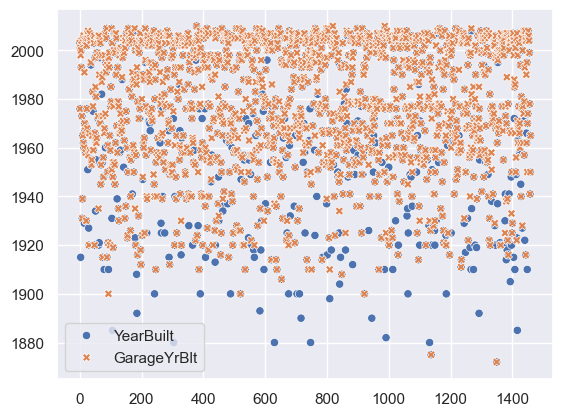

In [274]:
sns.scatterplot([train['YearBuilt'],train['GarageYrBlt']])

In [275]:
train['YearBuilt'].corr(train['GarageYrBlt'])

0.8451406660104691

In [276]:
Year_built=train[train['GarageYrBlt'].isna()]['YearBuilt']

In [277]:
train[train['GarageYrBlt'].isna()]['YearBuilt']

Series([], Name: YearBuilt, dtype: int64)

In [278]:
train['GarageYrBlt'].fillna(Year_built,inplace=True)

C:\Users\Amirmahdi\AppData\Local\Temp\ipykernel_20720\1825100686.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train['GarageYrBlt'].fillna(Year_built,inplace=True)


In [279]:
train_no_dummy=train.loc[:,:'SalePrice-noSkew']
train_no_dummy=pd.concat([train_no_dummy,categorical_columns],axis=1)

In [280]:
train_no_dummy

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,Functional,FireplaceQu,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,Fence,SaleType,SaleCondition
0,1,60,65.0,8450,7,5,2003,2003,196.0,706,...,Typ,noFireplace,Basment & Attchd & 2Types,RFn,TA & Ex,TA,Y,noFence,WD,Normal
1,2,20,80.0,9600,6,8,1976,1976,0.0,978,...,Typ,TA,Basment & Attchd & 2Types,RFn,TA & Ex,TA,Y,noFence,WD,Normal
2,3,60,68.0,11250,7,5,2001,2002,162.0,486,...,Typ,TA,Basment & Attchd & 2Types,RFn,TA & Ex,TA,Y,noFence,WD,Normal
3,4,70,60.0,9550,7,5,1915,1970,0.0,216,...,Typ,Gd,Detchd,Unf,TA & Ex,TA,Y,noFence,WD,Abnorml
4,5,60,84.0,14260,8,5,2000,2000,350.0,655,...,Typ,TA,Basment & Attchd & 2Types,RFn,TA & Ex,TA,Y,noFence,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,62.0,7917,6,5,1999,2000,0.0,0,...,Typ,TA,Basment & Attchd & 2Types,RFn,TA & Ex,TA,Y,noFence,WD,Normal
1456,1457,20,85.0,13175,6,6,1978,1988,119.0,790,...,other,TA,Basment & Attchd & 2Types,Unf,TA & Ex,TA,Y,MnPrv,WD,Normal
1457,1458,70,66.0,9042,7,9,1941,2006,0.0,275,...,Typ,Gd,Basment & Attchd & 2Types,RFn,TA & Ex,TA,Y,GdPrv,WD,Normal
1458,1459,20,68.0,9717,5,6,1950,1996,0.0,49,...,Typ,noFireplace,Basment & Attchd & 2Types,Unf,TA & Ex,TA,Y,noFence,WD,Normal


In [281]:
train_no_dummy.to_csv('final_without_dummy.csv')

## Check_Point 1

In [282]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 65 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Id                        1460 non-null   int64  
 1   MSSubClass                1460 non-null   int64  
 2   LotFrontage               1460 non-null   float64
 3   LotArea                   1460 non-null   int64  
 4   OverallQual               1460 non-null   int64  
 5   OverallCond               1460 non-null   int64  
 6   YearBuilt                 1460 non-null   int64  
 7   YearRemodAdd              1460 non-null   int64  
 8   MasVnrArea                1460 non-null   float64
 9   BsmtFinSF1                1460 non-null   int64  
 10  BsmtFinSF2                1460 non-null   int64  
 11  BsmtUnfSF                 1460 non-null   int64  
 12  TotalBsmtSF               1460 non-null   int64  
 13  1stFlrSF                  1460 non-null   int64  
 14  2ndFlrSF

In [283]:
train.to_csv('train_final1')

In [284]:
train

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,MasVnrType_None & BrkCmn,MasVnrType_Stone,HeatingQC_Fa,HeatingQC_Gd,HeatingQC_TA,FireplaceQu_Fa,FireplaceQu_Gd,FireplaceQu_Po,FireplaceQu_TA,FireplaceQu_noFireplace
0,1,60,65.0,8450,7,5,2003,2003,196.0,706,...,False,False,False,False,False,False,False,False,False,True
1,2,20,80.0,9600,6,8,1976,1976,0.0,978,...,True,False,False,False,False,False,False,False,True,False
2,3,60,68.0,11250,7,5,2001,2002,162.0,486,...,False,False,False,False,False,False,False,False,True,False
3,4,70,60.0,9550,7,5,1915,1970,0.0,216,...,True,False,False,True,False,False,True,False,False,False
4,5,60,84.0,14260,8,5,2000,2000,350.0,655,...,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,62.0,7917,6,5,1999,2000,0.0,0,...,True,False,False,False,False,False,False,False,True,False
1456,1457,20,85.0,13175,6,6,1978,1988,119.0,790,...,False,True,False,False,True,False,False,False,True,False
1457,1458,70,66.0,9042,7,9,1941,2006,0.0,275,...,True,False,False,False,False,False,True,False,False,False
1458,1459,20,68.0,9717,5,6,1950,1996,0.0,49,...,True,False,False,True,False,False,False,False,False,True


## Moving data so SQL SERVER

In [285]:
from sqlalchemy import create_engine
# Define SQL Server credentials
server = "DESKTOP-AUGJOSS"
database = "HousePricePrediction"
username = "sa"
password = "1234"

# Build connection string
engine = create_engine(f"mssql+pyodbc://{username}:{password}@{server}/{database}?driver=ODBC+Driver+17+for+SQL+Server")
train_no_dummy.to_sql("main_table", con=engine, if_exists="replace", index=False)

4

In [286]:
categorical_columns.to_sql("categorical_table", con=engine, if_exists="replace", index=False)
train.to_sql("via_dummy", con=engine, if_exists="replace", index=False)

20

## Exporting from Sql 

In [287]:
# import pandas as pd
# import pyodbc
# 
# # Connect to SQL Server
# conn = pyodbc.connect("DRIVER={ODBC Driver 17 for SQL Server};SERVER=DESKTOP-AUGJOSS;DATABASE=HousePricePrediction;UID=sa;PWD=1234;TrustServerCertificate=yes")
# 
# # Load data into Pandas
# query = "SELECT * FROM via_dummy"
# df = pd.read_sql(query, conn)
# 
# # Export to CSV
# df.to_csv(r"C:\Users\Amirmahdi\Desktop\Data Analyst Projects (Python)\Kaggle projects\House Prices - Advanced Regression Techniques\Sql\Data set\via_dummy.csv", index=False)
# 
# print("✅ Data exported successfully!")
